In [2]:
import glob
import pandas as pd
from scipy import stats
import numpy as np
import itertools

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
file_list = glob.glob('../output/*.csv')

n = len(file_list) # Número de sementes: 10 (Número de arquivos lido)
dfs = [pd.read_csv(file) for file in file_list]

df = pd.concat(dfs)
df = df[df['vType'] == 'emergency_emergency']
df.head(2)

id  depart departLane  departPos  departPosLat  \
1793  veh_emergency_360.0   419.0     A3B3_0        6.6           0.0   
2130  veh_emergency_490.0   520.0     A3B3_2        6.6           0.0   

      departSpeed  departDelay  arrival arrivalLane  arrivalPos  ...  \
1793          0.0         29.0    778.0      E2D2_1       272.8  ...   
2130          0.0          0.0    890.0      E2D2_0       272.8  ...   

                    vType  speedFactor  vaporized  seed  ALGORITHM  \
1793  emergency_emergency          1.0        NaN   999    default   
2130  emergency_emergency          1.0        NaN   999    default   

      DELAY_TO_DISPATCH_EMERGENCY_VEHICLE  CAR_FOLLOW_MODEL  \
1793                                 30.0            Krauss   
2130                                 30.0            Krauss   

      TIME_TO_BLOCK_CREATE_ACCIDENTS  SAVEDS UNSAVEDS  
1793                            50.0       6        3  
2130                            50.0       6        3  

[2 rows x 30 columns]

In [4]:
lista_index = ['ALGORITHM', 'TIME_TO_BLOCK_CREATE_ACCIDENTS', 'DELAY_TO_DISPATCH_EMERGENCY_VEHICLE','CAR_FOLLOW_MODEL']
to_exclude = [
    'id', 'depart', 'departLane', 'departPos', 'departPosLat',
    'departSpeed', 'departDelay', 'arrival', 'arrivalLane', 'arrivalPos', 'arrivalPosLat',
    'arrivalSpeed','devices','vaporized','vType', 'seed', 'speedFactor', 'rerouteNo', 'routeLength',
    'stopTime', 'waitingTime', 'waitingCount'
]
var_resposta = list(
    set(df.columns) - set(
        lista_index + to_exclude
    )
)
var_resposta

['UNSAVEDS', 'SAVEDS', 'duration', 'timeLoss']

In [63]:
# Pruning datafrme
df_cleanned = df.drop(columns=to_exclude)
df_cleanned

duration  timeLoss ALGORITHM  DELAY_TO_DISPATCH_EMERGENCY_VEHICLE  \
1793      359.0    206.43   default                                 30.0   
2130      370.0    138.44   default                                 30.0   
2829      665.0    344.41   default                                 30.0   
2867      806.0    308.40   default                                 30.0   
3422      580.0    399.55   default                                 30.0   
...         ...       ...       ...                                  ...   
56334     518.0    311.97  proposto                                120.0   
56985     740.0    431.04  proposto                                120.0   
57093     666.0    351.38  proposto                                120.0   
57148     587.0    277.97  proposto                                120.0   
57576     482.0    200.25  proposto                                120.0   

      CAR_FOLLOW_MODEL  TIME_TO_BLOCK_CREATE_ACCIDENTS  SAVEDS  UNSAVEDS  
1793            Krauss                            50.0       6         3  
2130            Krauss                            50.0       6         3  
2829            Krauss                            50.0       6         3  
2867            Krauss                            50.0       6         3  
3422            Krauss                            50.0       6         3  
...                ...                             ...     ...       ...  
56334             EIDM                           100.0       7         0  
56985             EIDM                           100.0       7         0  
57093             EIDM                           100.0       7         0  
57148             EIDM                           100.0       7         0  
57576             EIDM                           100.0       7         0  

[715 rows x 8 columns]

In [65]:
df_cleanned.describe()

duration     timeLoss  DELAY_TO_DISPATCH_EMERGENCY_VEHICLE  \
count   715.000000   715.000000                           715.000000   
mean    715.948252   460.620210                            70.027972   
std     449.375709   433.477983                            44.755787   
min     180.000000    32.140000                            30.000000   
25%     424.500000   175.265000                            30.000000   
50%     568.000000   308.760000                            30.000000   
75%     863.000000   582.625000                           120.000000   
max    3651.000000  3278.190000                           120.000000   

       TIME_TO_BLOCK_CREATE_ACCIDENTS      SAVEDS    UNSAVEDS  
count                      715.000000  715.000000  715.000000  
mean                        73.776224    6.493706    1.562238  
std                         24.987509    2.544484    1.681994  
min                         50.000000    0.000000    0.000000  
25%                         50.000000    5.000000    0.000000  
50%                         50.000000    7.000000    1.000000  
75%                        100.000000    8.000000    3.000000  
max                        100.000000   11.000000    9.000000

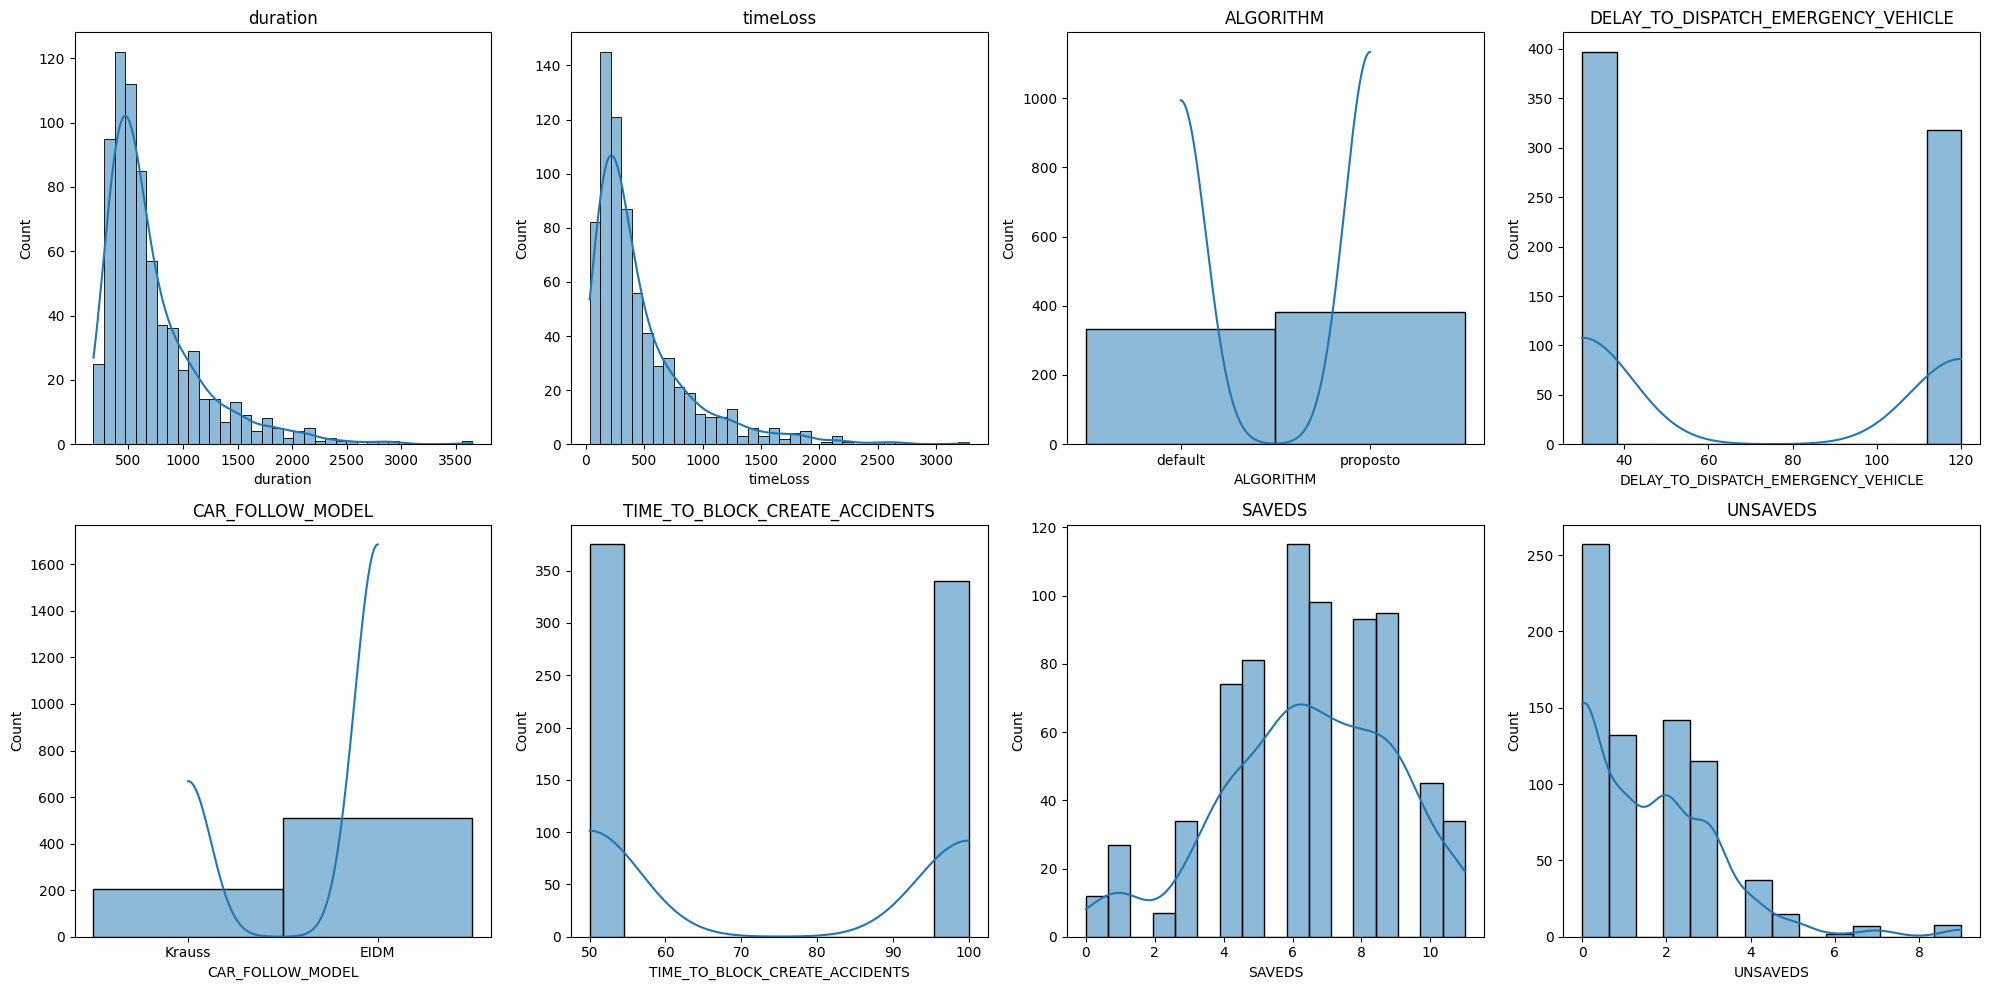

In [87]:
# Visualização
def plot_distributions(dataframe: pd.DataFrame):
    num_cols = len(dataframe.columns)
    num_rows = (num_cols + 3) // 4  # Ajuste o número de colunas por linha conforme necessário
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    for i, col in enumerate(dataframe.columns):
        ax = axes[i // 4, i % 4]
        sns.histplot(dataframe[col].dropna(), kde=True, ax=ax)
        ax.set_title(col)
    
    plt.tight_layout()
    plt.show()

plot_distributions(df_cleanned)

In [60]:
grouped = df.drop(columns=to_exclude).groupby(lista_index).agg(['mean', 'std']).reset_index()
grouped[lista_index].apply(lambda x: '-'.join(x.astype(str)), axis=1)

0          default-50.0-30.0-EIDM
1        default-50.0-30.0-Krauss
2         default-50.0-120.0-EIDM
3       default-50.0-120.0-Krauss
4         default-100.0-30.0-EIDM
5       default-100.0-30.0-Krauss
6        default-100.0-120.0-EIDM
7      default-100.0-120.0-Krauss
8         proposto-50.0-30.0-EIDM
9       proposto-50.0-30.0-Krauss
10       proposto-50.0-120.0-EIDM
11     proposto-50.0-120.0-Krauss
12       proposto-100.0-30.0-EIDM
13     proposto-100.0-30.0-Krauss
14      proposto-100.0-120.0-EIDM
15    proposto-100.0-120.0-Krauss
dtype: object

In [62]:
grouped = df.drop(columns=to_exclude).groupby(lista_index).agg(['mean','std']).reset_index()
#Criando coluna ID para o gráfico de barra com intervalo de confiança
grouped['id'] = grouped[lista_index].apply(lambda x: '-'.join(x.astype(str)), axis=1)
grouped.sort_values(by=lista_index,ascending=[True, True,True,True], inplace=True)
grouped

ALGORITHM TIME_TO_BLOCK_CREATE_ACCIDENTS  \
                                              
0    default                           50.0   
1    default                           50.0   
2    default                           50.0   
3    default                           50.0   
4    default                          100.0   
5    default                          100.0   
6    default                          100.0   
7    default                          100.0   
8   proposto                           50.0   
9   proposto                           50.0   
10  proposto                           50.0   
11  proposto                           50.0   
12  proposto                          100.0   
13  proposto                          100.0   
14  proposto                          100.0   
15  proposto                          100.0   

   DELAY_TO_DISPATCH_EMERGENCY_VEHICLE CAR_FOLLOW_MODEL     duration  \
                                                                mean   
0                                 30.0             EIDM  1012.273973   
1                                 30.0           Krauss   737.571429   
2                                120.0             EIDM   966.982143   
3                                120.0           Krauss   917.185185   
4                                 30.0             EIDM   859.900000   
5                                 30.0           Krauss   562.343750   
6                                120.0             EIDM   807.875000   
7                                120.0           Krauss   999.583333   
8                                 30.0             EIDM   530.386364   
9                                 30.0           Krauss   568.400000   
10                               120.0             EIDM   673.746032   
11                               120.0           Krauss   546.931034   
12                                30.0             EIDM   507.185714   
13                                30.0           Krauss   445.885714   
14                               120.0             EIDM   680.185185   
15                               120.0           Krauss   551.705882   

                  timeLoss                SAVEDS            UNSAVEDS  \
           std        mean         std      mean       std      mean   
0   625.556758  760.839315  616.309015  5.958904  2.750951  3.178082   
1   308.327427  443.726429  258.160540  5.571429  0.513553  2.571429   
2   606.541417  690.340714  586.790620  4.375000  1.804666  3.125000   
3   395.962706  657.424444  396.287358  4.222222  1.154701  3.259259   
4   657.283281  606.792500  642.842417  6.100000  2.152649  1.416667   
5   248.720157  337.119062  231.685056  5.906250  1.872714  1.843750   
6   339.486698  536.350833  329.426605  4.458333  1.737672  1.666667   
7   552.998303  753.626667  535.155337  3.333333  2.745220  2.375000   
8   231.476939  284.568977  215.445673  9.931818  0.932127  0.409091   
9   226.268461  329.710400  208.917830  8.360000  2.481263  1.120000   
10  284.476711  405.007619  267.208999  6.888889  1.769920  1.174603   
11  201.330207  295.424483  195.760588  7.931034  1.579580  0.413793   
12  254.241885  264.479286  241.786058  7.628571  0.819534  0.428571   
13  162.070386  213.790000  143.309351  7.657143  2.338210  0.600000   
14  341.187000  397.716296  303.377650  5.185185  1.150456  1.685185   
15  252.468009  312.513529  217.085467  5.470588  1.699913  0.764706   

                                       id  
         std                               
0   2.329416       default-50.0-30.0-EIDM  
1   0.513553     default-50.0-30.0-Krauss  
2   1.799621      default-50.0-120.0-EIDM  
3   1.095185    default-50.0-120.0-Krauss  
4   1.464746      default-100.0-30.0-EIDM  
5   0.987319    default-100.0-30.0-Krauss  
6   1.243422     default-100.0-120.0-EIDM  
7   1.929463   default-100.0-120.0-Krauss  
8   0.494484      proposto-50.0-30.0-EIDM  
9   1.739732    proposto-50.0-30.0-Krauss  
10  1.338508     proposto-50.0-120

In [6]:
def calc_interval(grouped,var_resposta,n = 10,column_x = 'id', rotation = 0, z = stats.norm.ppf(0.975)):
    for var in var_resposta:
        #Calculo do erro médio para o intervalo de confiança
        grouped[(var, 'mean_error')] = z * (grouped[(var, 'std')] / np.sqrt(n)) 

In [8]:
calc_interval(grouped=grouped, var_resposta=var_resposta)

In [9]:
num_factors = len(lista_index)
factor_names = lista_index
factor_levels_real = {factor:list(grouped[factor].unique()) for factor in factor_names}
num_factors, factor_levels_real

(4,
 {'ALGORITHM': ['default', 'proposto'],
  'TIME_TO_BLOCK_CREATE_ACCIDENTS': [50.0, 100.0],
  'DELAY_TO_DISPATCH_EMERGENCY_VEHICLE': [30.0, 120.0],
  'CAR_FOLLOW_MODEL': ['EIDM', 'Krauss']})

In [10]:
num_response_vars = len(var_resposta)
response_vars_names = var_resposta
num_response_vars, response_vars_names

(4, ['UNSAVEDS', 'SAVEDS', 'duration', 'timeLoss'])

In [12]:
# Calculating the total number of experiments
total_experiments = 2 ** num_factors
total_experiments

16

In [39]:
# Preparing the DataFrame
level_combinations = list(itertools.product([-1, 1], repeat=num_factors))
experiment_design_df = pd.DataFrame(level_combinations, columns=factor_names)
experiment_design_df.insert(0, 'Exp', range(1, len(experiment_design_df) + 1))
experiment_design_df

Exp  ALGORITHM  TIME_TO_BLOCK_CREATE_ACCIDENTS  \
0     1         -1                              -1   
1     2         -1                              -1   
2     3         -1                              -1   
3     4         -1                              -1   
4     5         -1                               1   
5     6         -1                               1   
6     7         -1                               1   
7     8         -1                               1   
8     9          1                              -1   
9    10          1                              -1   
10   11          1                              -1   
11   12          1                              -1   
12   13          1                               1   
13   14          1                               1   
14   15          1                               1   
15   16          1                               1   

    DELAY_TO_DISPATCH_EMERGENCY_VEHICLE  CAR_FOLLOW_MODEL  
0                                    -1                -1  
1                                    -1                 1  
2                                     1                -1  
3                                     1                 1  
4                                    -1                -1  
5                                    -1                 1  
6                                     1                -1  
7                                     1                 1  
8                                    -1                -1  
9                                    -1                 1  
10                                    1                -1  
11                                    1                 1  
12                                   -1                -1  
13                                   -1                 1  
14                                    1                -1  
15                                    1                 1

In [40]:
for var_name in response_vars_names:
    experiment_design_df[var_name] = grouped[var_name]['mean']
    experiment_design_df[var_name+'_err'] = grouped[var_name]['mean_error']
experiment_design_df

Exp  ALGORITHM  TIME_TO_BLOCK_CREATE_ACCIDENTS  \
0     1         -1                              -1   
1     2         -1                              -1   
2     3         -1                              -1   
3     4         -1                              -1   
4     5         -1                               1   
5     6         -1                               1   
6     7         -1                               1   
7     8         -1                               1   
8     9          1                              -1   
9    10          1                              -1   
10   11          1                              -1   
11   12          1                              -1   
12   13          1                               1   
13   14          1                               1   
14   15          1                               1   
15   16          1                               1   

    DELAY_TO_DISPATCH_EMERGENCY_VEHICLE  CAR_FOLLOW_MODEL  UNSAVEDS  \
0                                    -1                -1  3.178082   
1                                    -1                 1  2.571429   
2                                     1                -1  3.125000   
3                                     1                 1  3.259259   
4                                    -1                -1  1.416667   
5                                    -1                 1  1.843750   
6                                     1                -1  1.666667   
7                                     1                 1  2.375000   
8                                    -1                -1  0.409091   
9                                    -1                 1  1.120000   
10                                    1                -1  1.174603   
11                                    1                 1  0.413793   
12                                   -1                -1  0.428571   
13                                   -1                 1  0.600000   
14                                    1                -1  1.685185   
15                                    1                 1  0.764706   

    UNSAVEDS_err    SAVEDS  SAVEDS_err     duration  duration_err    timeLoss  \
0       1.443761  5.958904    1.705026  1012.273973    387.716971  760.839315   
1       0.318297  5.571429    0.318297   737.571429    191.099808  443.726429   
2       1.115396  4.375000    1.118523   966.982143    375.931357  690.340714   
3       0.678790  4.222222    0.715678   917.185185    245.415718  657.424444   
4       0.907842  6.100000    1.334201   859.900000    407.380913  606.792500   
5       0.611935  5.906250    1.160699   562.343750    154.155518  337.119062   
6       0.770667  4.458333    1.077000   807.875000    210.412169  536.350833   
7       1.195871  3.333333    1.701474   999.583333    342.745601  753.626667   
8       0.306479  9.931818    0.577728   530.386364    143.468257  284.568977   
9       1.078277  8.360000    1.537875   568.400000    140.240068  329.710400   
10      0.829600  6.888889    1.096988   673.746032    176.317252  405.007619   
11      0.511022  7.931034    0.979016   546.931034    124.783462  295.424483   
12      0.416392  7.628571    0.507943   507.185714    157.577857  264.479286   
13      0.658680  7.657143    1.449211   445.885714    100.450420  213.790000   
14      0.575204  5.185185    0.713047   680.185185    211.466008  397.716296   
15      0.676451  5.470588    1.053598   551.705882    156.478418  312.513529   

    timeLoss_err  
0     381.985266  
1     160.006620  
2     363.689911  
3     245.616936  
4     398.430536  
5     143.597247  
6     204.176973  
7     331.686620  
8     133.532158  
9     129.486233  
10    165.614810  
11    121.331440  
12    149.857798  
13     88.822424  
14    188.031960  
15    134.548494

In [141]:
# Generating interactions between factors
interaction_columns = []
for combo_length in range(2, num_factors + 1):
    for combo in itertools.combinations(factor_names, combo_length):
        interaction_name = ':'.join(combo)
        experiment_design_df[interaction_name] = np.prod(experiment_design_df[list(combo)], axis=1)
        interaction_columns.append(interaction_name)


In [14]:
# Adjusting real levels in the real experiment settings
experiment_settings_real_df = experiment_design_df.copy()
for factor_name in factor_names:
    experiment_settings_real_df[factor_name] = experiment_settings_real_df[factor_name].map({-1: factor_levels_real[factor_name][0], 1: factor_levels_real[factor_name][1]})

In [145]:
df['ALGORITHM'].values * df['duration'].values

TypeError: can't multiply sequence by non-int of type 'float'

In [15]:
# Function to calculate the effects and SS
def calculate_effects_SS_dynamic(df, response_var_names):
    results = {}
    for response_var_name in response_var_names:
        n = len(df)
        response_values = df[response_var_name].values
        factor_columns = [col for col in df.columns if col not in ['Exp'] + response_var_names]
        effects = {}
        SS = {}

        for factor in factor_columns:
            factor_values = df[factor].values
            effect = np.sum(factor_values * response_values) / n
            effects[factor] = effect
            SS[factor] = n * effect ** 2

        SST = np.sum((response_values - np.mean(response_values)) ** 2)
        results[response_var_name] = (effects, SS, SST)
    return results

# Function to print formatted results
def print_formatted_results(results):
    for response_var_name, (effects, SS, SST) in results.items():
        print(f"\n{response_var_name} - Effects of Factors and Interactions:")
        for name, effect in effects.items():
            print(f"  {name}: {effect:.4f}")
        print(f"\n{response_var_name} - Sum of Squares (SS) for each Factor and Interaction:")
        for name, ss in SS.items():
            print(f"  {name}: {ss:.4f}")
        print(f"\n{response_var_name} - Total Sum of Squares (SST): {SST:.4f}")
        print(f"\n{response_var_name} - Percentage Influence of each Factor and Interaction:")
        for name, ss in SS.items():
            print(f"  {name}: {(ss / SST) * 100:.2f}%")

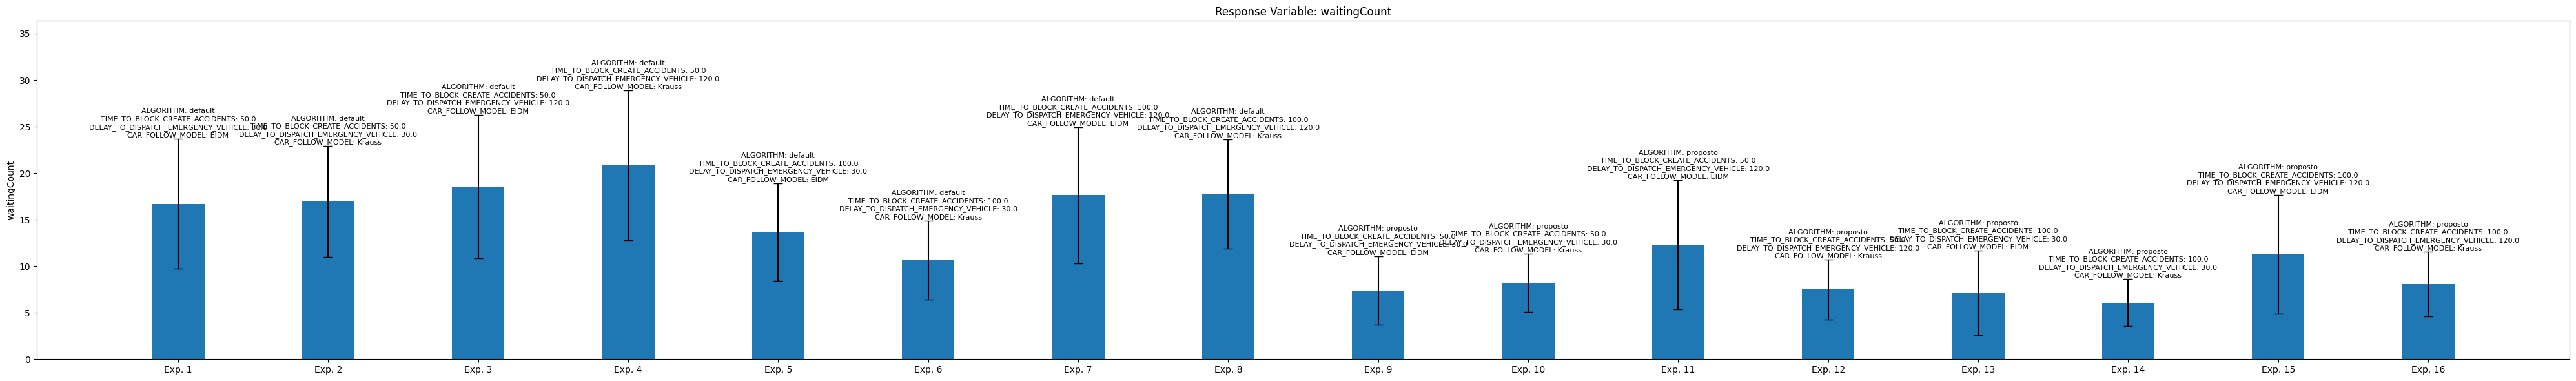

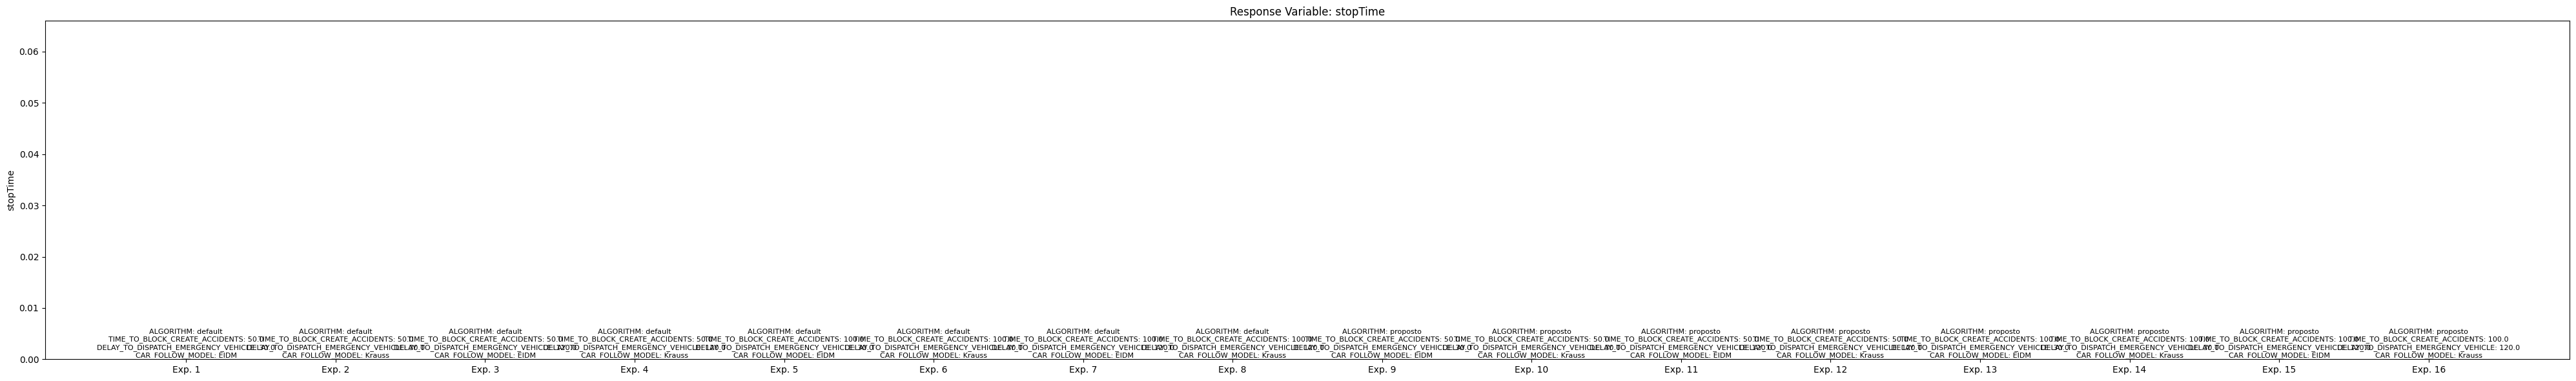

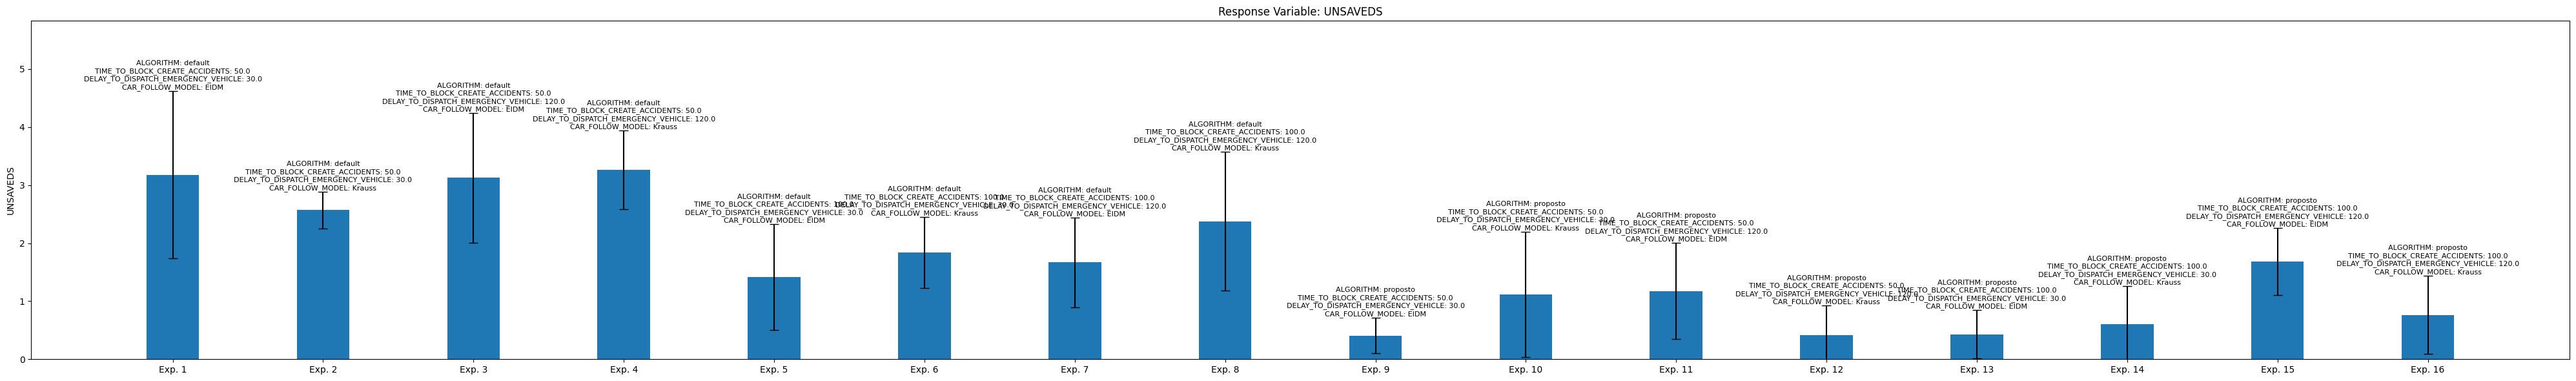

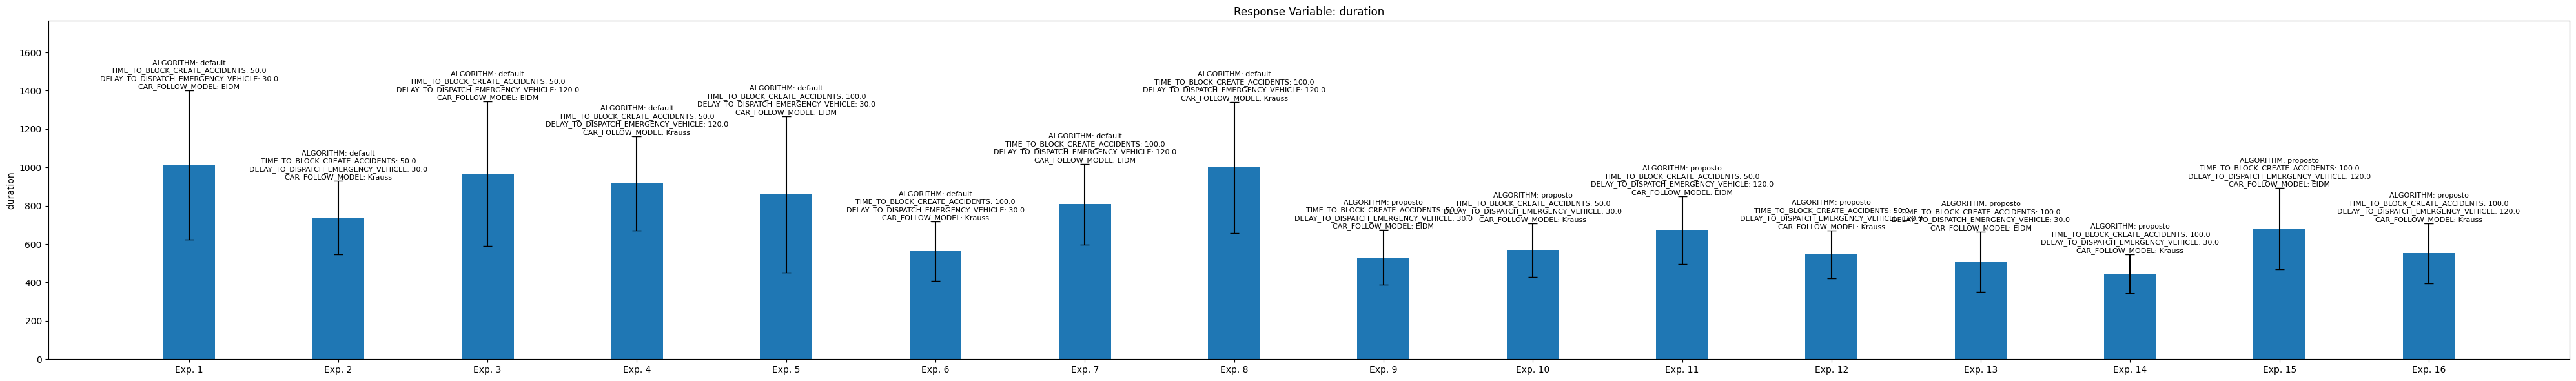

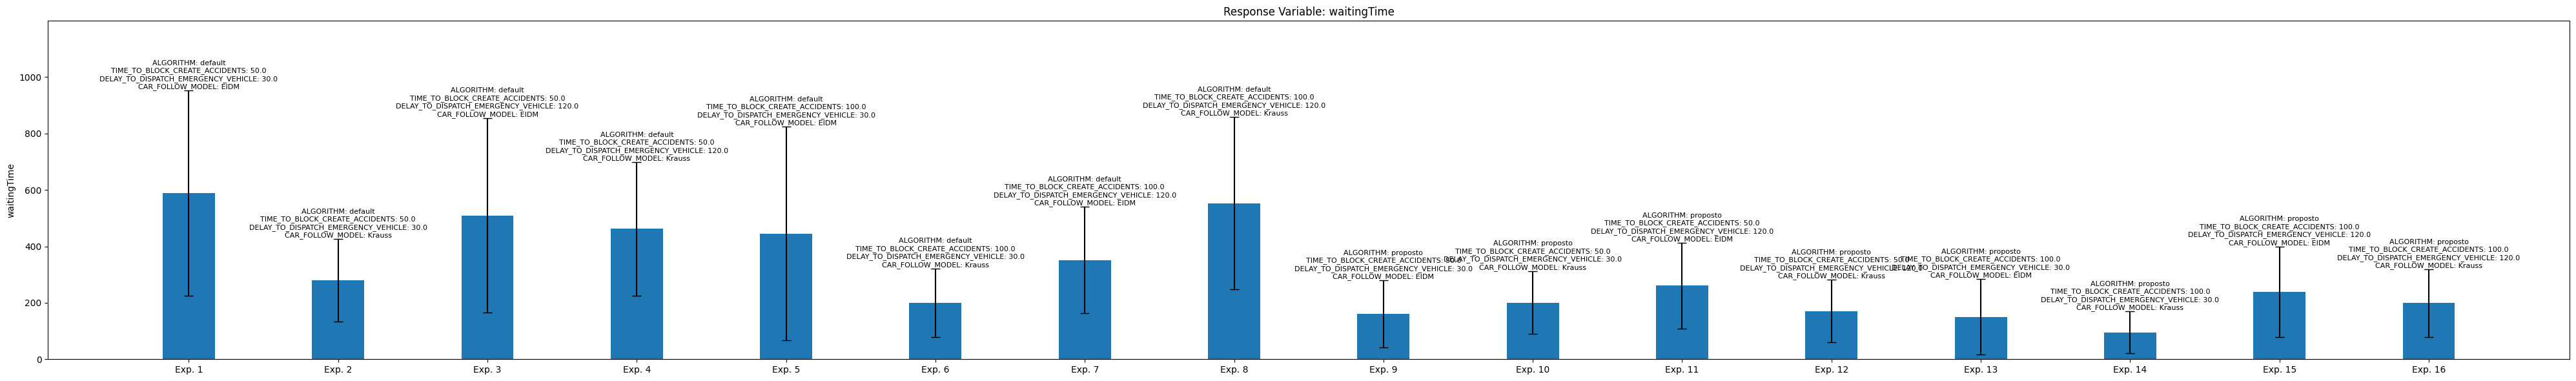

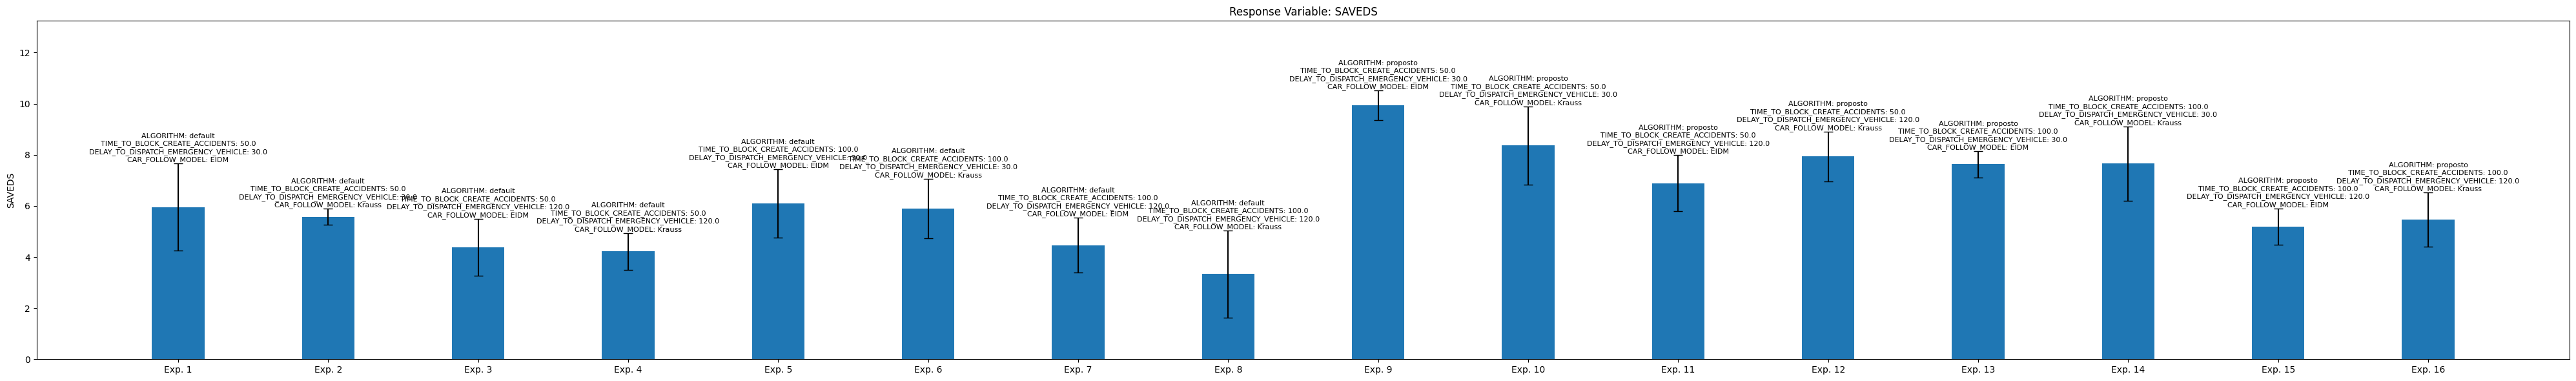

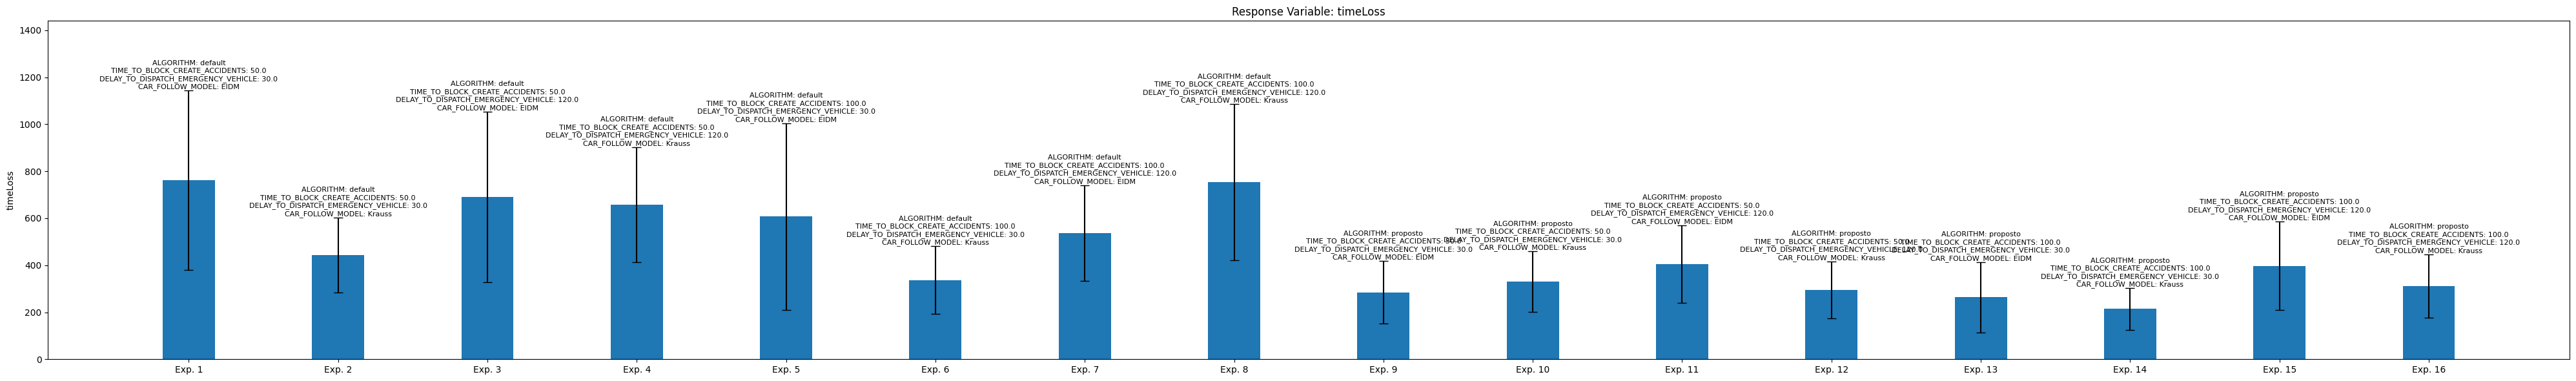

In [16]:
n_cols = 4
# Adjusting the bar width, if necessary
width = 0.35

for var_name in response_vars_names:
    # Increasing the chart height to accommodate labels
    plt.figure(figsize=(10 * n_cols, 6))  # Increasing the second value in figsize to increase the chart height
    
    n_experiments = len(experiment_settings_real_df)  # Number of experiments
    ind = np.arange(n_experiments)  # Indices for the experiments for bar positioning
    
    # Plotting the data from the real experiment settings
    bars = plt.bar(ind, experiment_settings_real_df[var_name],yerr=experiment_settings_real_df[var_name+"_err"],capsize=5,width= width, label='Experiments')
    # for i, (x_val, y_val, yerr_val) in enumerate(zip(grouped[column_x], grouped[(var, 'mean')], grouped[(var, 'mean_error')])):
    # plt.bar(x_val, y_val, yerr=yerr_val, color=colors[group_labels[i]], capsize=5)
    
    plt.title(f'Response Variable: {var_name}')  # Chart title
    plt.ylabel(var_name)  # Y-axis label
    
    # Generating labels for each bar based on factor combinations
    exp_labels = ['Exp. ' + str(exp) for exp in experiment_settings_real_df['Exp']]
    plt.xticks(ind, exp_labels)
    
    # Adding labels above bars to show factor combinations
    for bar, label in zip(bars, experiment_settings_real_df.to_dict('records')):
        height = bar.get_height()
        comb_label = '\n'.join([f"{k}: {v}" for k, v in label.items() if k in factor_names])
        height_err_plus = label[var_name+"_err"]
        plt.text(bar.get_x() + bar.get_width() / 2, height+height_err_plus, comb_label, ha='center', va='bottom', rotation=0, fontsize=8)
    
    # Adjusting the Y-axis limits to ensure labels fit without being cut off
    plt.ylim(0, plt.ylim()[1] * 1.2)  # Increases the upper limit of the Y-axis by 20%

    plt.tight_layout()
    # plt.savefig('../plot/Experiment/{}.pdf'.format(var_name), format='pdf')
    plt.savefig('../plot/Tripinfo_Emergency_Vehicle_Experiment/{}.pdf'.format(var_name), format='pdf')
    plt.show()


# Gráfico 2

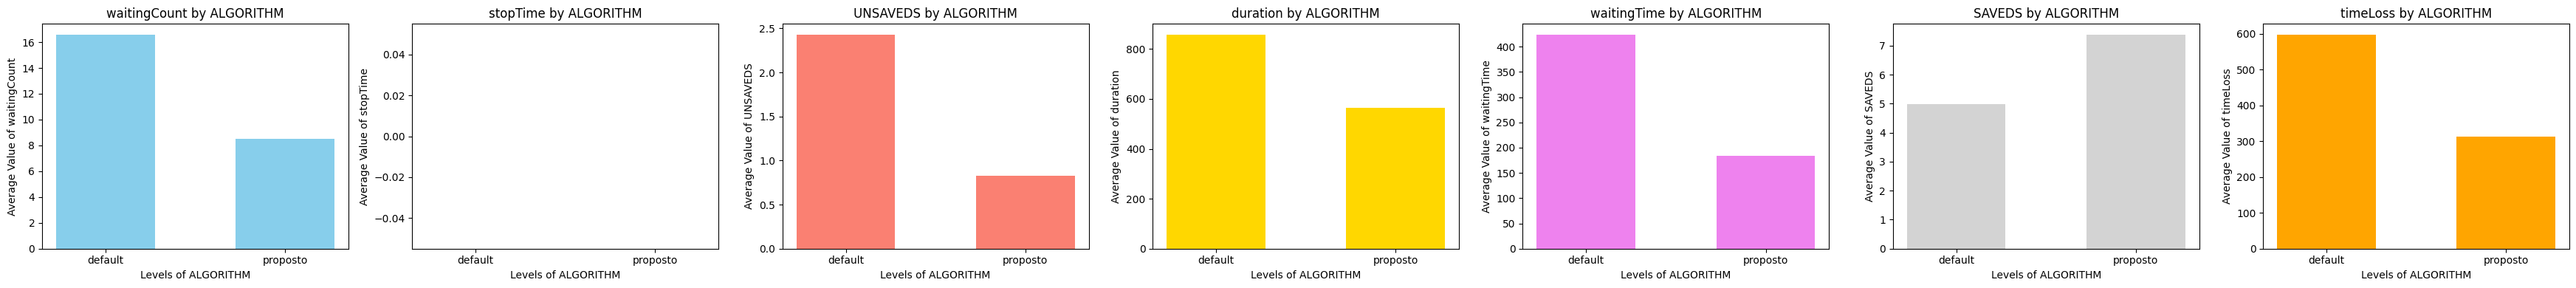

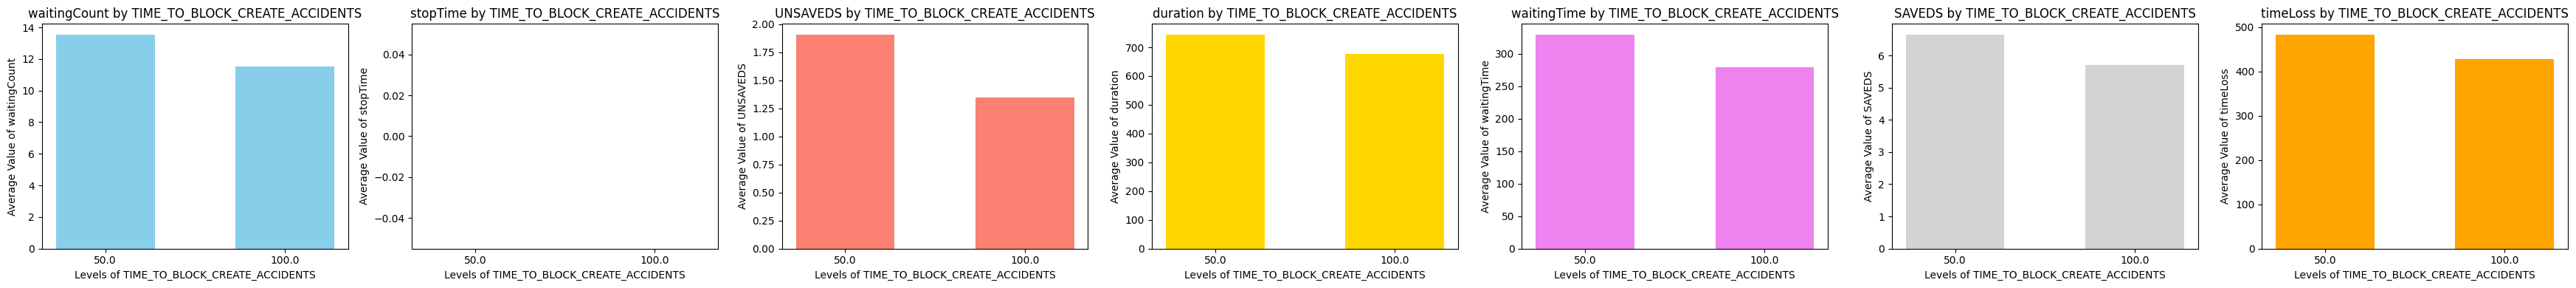

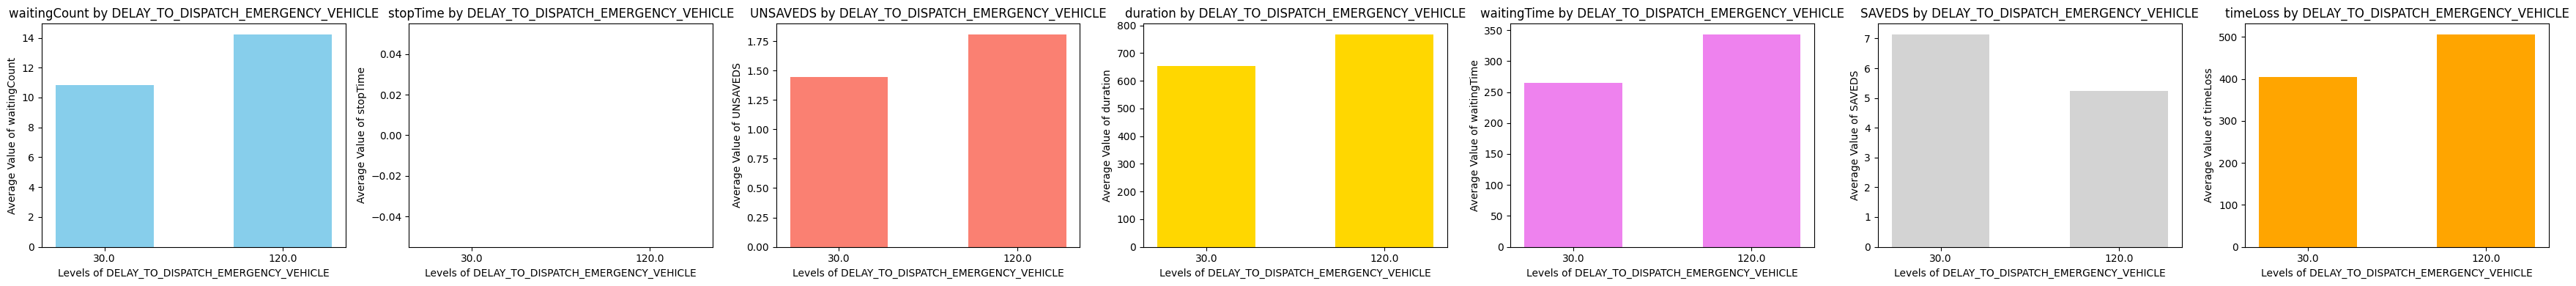

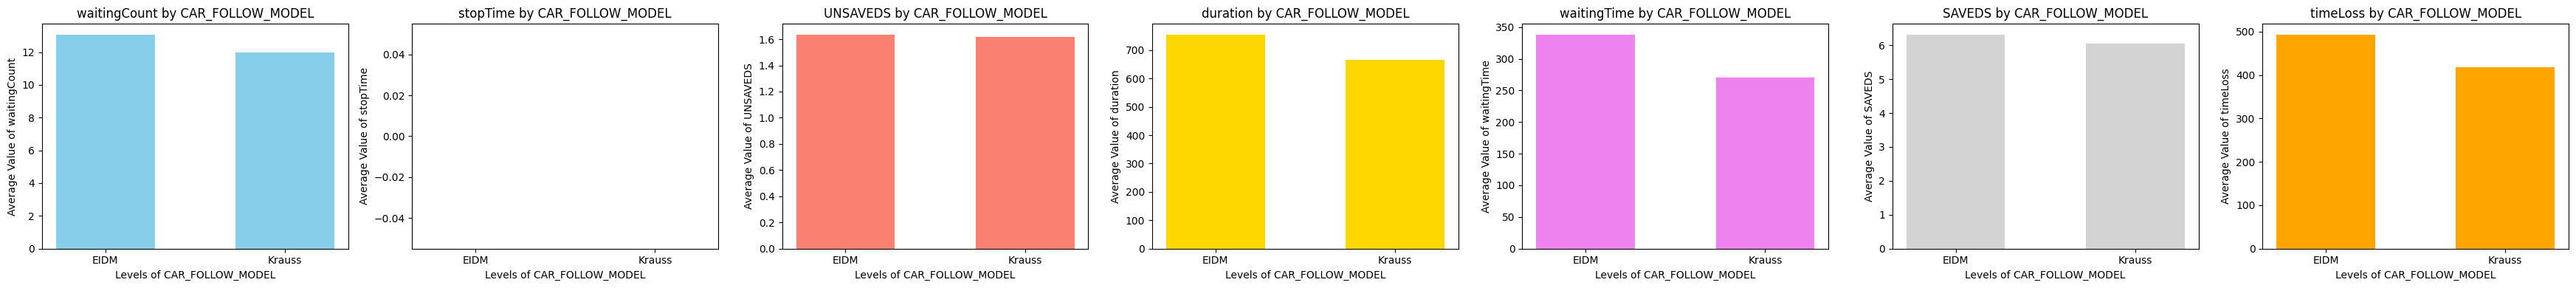

In [19]:
# Defining a color list for the response variables
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'violet', 'lightgrey', 'orange', 'cyan']

# Bar width
width = 0.55

# Iterating through each factor
for factor_name in factor_names:
    unique_levels = np.sort(experiment_settings_real_df[factor_name].unique())
    
    # Determining the number of subplots based on the number of response variables
    n_vars = len(response_vars_names)
    
    # The number of columns equals the number of response variables
    n_cols = n_vars
    # Always 1 row since we are fitting everything in a single horizontal line
    n_rows = 1
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4))  # Adjusting size as necessary
    axs = axs.flatten() if n_vars > 1 else [axs]  # Ensures axs is always iterable
    
    for i, var_name in enumerate(response_vars_names):
        mean_values = []
        # Preparing data for plotting
        for level in unique_levels:
            level_data = experiment_settings_real_df[experiment_settings_real_df[factor_name] == level]
            mean_val = level_data[var_name].mean()
            mean_values.append(mean_val)
        
        # Bar positions on the X-axis
        ind = np.arange(len(unique_levels))
        
        # Choosing the color for the current response variable
        bar_color = colors[i % len(colors)]
        
        # Plotting the bars
        axs[i].bar(ind, mean_values, width, label=f'{var_name}', color=bar_color)
        
        axs[i].set_title(f'{var_name} by {factor_name}')
        axs[i].set_xticks(ind)
        axs[i].set_xticklabels(unique_levels, rotation=0)  # Adjusting rotation for better visualization if needed
        axs[i].set_xlabel(f'Levels of {factor_name}')
        axs[i].set_ylabel(f'Average Value of {var_name}')
        #axs[i].legend()
    
    plt.tight_layout()
    plt.savefig('../plot/Tripinfo_Emergency_Vehicle_Experiment/{}-{}.pdf'.format(factor_name,var_name), format='pdf')
    plt.show()


### Tabela de conferência

In [21]:
# Displaying the tables
print("\nDesign of the Experiment with Coded Levels:")
display(experiment_design_df)
print("\nExperiment Settings with Real Levels:")
display(experiment_settings_real_df)

# Calculating the effects and SS for each response variable
results = calculate_effects_SS_dynamic(experiment_design_df, response_vars_names)

# Printing the formatted results
#print_formatted_results(results)


Design of the Experiment with Coded Levels:


Exp  ALGORITHM  TIME_TO_BLOCK_CREATE_ACCIDENTS  \
0     1         -1                              -1   
1     2         -1                              -1   
2     3         -1                              -1   
3     4         -1                              -1   
4     5         -1                               1   
5     6         -1                               1   
6     7         -1                               1   
7     8         -1                               1   
8     9          1                              -1   
9    10          1                              -1   
10   11          1                              -1   
11   12          1                              -1   
12   13          1                               1   
13   14          1                               1   
14   15          1                               1   
15   16          1                               1   

    DELAY_TO_DISPATCH_EMERGENCY_VEHICLE  CAR_FOLLOW_MODEL  waitingCount  \
0                                    -1                -1     16.698630   
1                                    -1                 1     16.928571   
2                                     1                -1     18.571429   
3                                     1                 1     20.814815   
4                                    -1                -1     13.650000   
5                                    -1                 1     10.656250   
6                                     1                -1     17.625000   
7                                     1                 1     17.750000   
8                                    -1                -1      7.386364   
9                                    -1                 1      8.200000   
10                                    1                -1     12.285714   
11                                    1                 1      7.482759   
12                                   -1                -1      7.128571   
13                                   -1                 1      6.085714   
14                                    1                -1     11.259259   
15                                    1                 1      8.058824   

    waitingCount_err  stopTime  stopTime_err  UNSAVEDS  ...  \
0           6.986022       0.0           0.0  3.178082  ...   
1           5.971964       0.0           0.0  2.571429  ...   
2           7.693140       0.0           0.0  3.125000  ...   
3           8.044557       0.0           0.0  3.259259  ...   
4           5.252725       0.0           0.0  1.416667  ...   
5           4.228958       0.0           0.0  1.843750  ...   
6           7.316358       0.0           0.0  1.666667  ...   
7           5.872075       0.0           0.0  2.375000  ...   
8           3.679897       0.0           0.0  0.409091  ...   
9           3.119567       0.0           0.0  1.120000  ...   
10          6.931690       0.0           0.0  1.174603  ...   
11          3.201839       0.0           0.0  0.413793  ...   
12          4.517628       0.0           0.0  0.428571  ...   
13          2.530473       0.0           0.0  0.600000  ...   
14          6.415375       0.0           0.0  1.685185  ...   
15          3.447187       0.0           0.0  0.764706  ...   

    ALGORITHM:DELAY_TO_DISPATCH_EMERGENCY_VEHICLE  ALGORITHM:CAR_FOLLOW_MODEL  \
0                                               1                           1   
1                                               1                          -1   
2                                              -1                           1   
3                                              -1                          -1   
4                                               1                           1   
5                                               1                          -1   
6                                              -1                           1   
7                                              -1                          -1   
8       


Experiment Settings with Real Levels:


Exp ALGORITHM  TIME_TO_BLOCK_CREATE_ACCIDENTS  \
0     1   default                            50.0   
1     2   default                            50.0   
2     3   default                            50.0   
3     4   default                            50.0   
4     5   default                           100.0   
5     6   default                           100.0   
6     7   default                           100.0   
7     8   default                           100.0   
8     9  proposto                            50.0   
9    10  proposto                            50.0   
10   11  proposto                            50.0   
11   12  proposto                            50.0   
12   13  proposto                           100.0   
13   14  proposto                           100.0   
14   15  proposto                           100.0   
15   16  proposto                           100.0   

    DELAY_TO_DISPATCH_EMERGENCY_VEHICLE CAR_FOLLOW_MODEL  waitingCount  \
0                                  30.0             EIDM     16.698630   
1                                  30.0           Krauss     16.928571   
2                                 120.0             EIDM     18.571429   
3                                 120.0           Krauss     20.814815   
4                                  30.0             EIDM     13.650000   
5                                  30.0           Krauss     10.656250   
6                                 120.0             EIDM     17.625000   
7                                 120.0           Krauss     17.750000   
8                                  30.0             EIDM      7.386364   
9                                  30.0           Krauss      8.200000   
10                                120.0             EIDM     12.285714   
11                                120.0           Krauss      7.482759   
12                                 30.0             EIDM      7.128571   
13                                 30.0           Krauss      6.085714   
14                                120.0             EIDM     11.259259   
15                                120.0           Krauss      8.058824   

    waitingCount_err  stopTime  stopTime_err  UNSAVEDS  ...  \
0           6.986022       0.0           0.0  3.178082  ...   
1           5.971964       0.0           0.0  2.571429  ...   
2           7.693140       0.0           0.0  3.125000  ...   
3           8.044557       0.0           0.0  3.259259  ...   
4           5.252725       0.0           0.0  1.416667  ...   
5           4.228958       0.0           0.0  1.843750  ...   
6           7.316358       0.0           0.0  1.666667  ...   
7           5.872075       0.0           0.0  2.375000  ...   
8           3.679897       0.0           0.0  0.409091  ...   
9           3.119567       0.0           0.0  1.120000  ...   
10          6.931690       0.0           0.0  1.174603  ...   
11          3.201839       0.0           0.0  0.413793  ...   
12          4.517628       0.0           0.0  0.428571  ...   
13          2.530473       0.0           0.0  0.600000  ...   
14          6.415375       0.0           0.0  1.685185  ...   
15          3.447187       0.0           0.0  0.764706  ...   

    ALGORITHM:DELAY_TO_DISPATCH_EMERGENCY_VEHICLE  ALGORITHM:CAR_FOLLOW_MODEL  \
0                                               1                           1   
1                                               1                          -1   
2                                              -1                           1   
3                                              -1                          -1   
4                                               1                           1   
5                                               1                          -1   
6                                              -1                           1   
7                                              -1                          -1   
8                                         

### Gráfico 3

dict_items([('waitingCount', ({'ALGORITHM': -4.0504681191298, 'TIME_TO_BLOCK_CREATE_ACCIDENTS': -1.0096664369757473, 'DELAY_TO_DISPATCH_EMERGENCY_VEHICLE': 1.6946061353194541, 'CAR_FOLLOW_MODEL': -0.5392521649450965, 'waitingCount_err': 74.2196583771574, 'stopTime_err': 0.0, 'UNSAVEDS_err': 10.130596741232992, 'duration_err': 3092.572344577882, 'waitingTime_err': 2733.7849510604815, 'SAVEDS_err': 13.495840008318122, 'timeLoss_err': 2950.611588016384, 'ALGORITHM:TIME_TO_BLOCK_CREATE_ACCIDENTS': 0.6568579319993919, 'ALGORITHM:DELAY_TO_DISPATCH_EMERGENCY_VEHICLE': -0.4088678422662524, 'ALGORITHM:CAR_FOLLOW_MODEL': -0.489824356816517, 'TIME_TO_BLOCK_CREATE_ACCIDENTS:DELAY_TO_DISPATCH_EMERGENCY_VEHICLE': 0.4519622489787092, 'TIME_TO_BLOCK_CREATE_ACCIDENTS:CAR_FOLLOW_MODEL': -0.3497531941429832, 'DELAY_TO_DISPATCH_EMERGENCY_VEHICLE:CAR_FOLLOW_MODEL': -0.1651234789906395, 'ALGORITHM:TIME_TO_BLOCK_CREATE_ACCIDENTS:DELAY_TO_DISPATCH_EMERGENCY_VEHICLE': -0.21175127343558375, 'ALGORITHM:TIME_TO_B

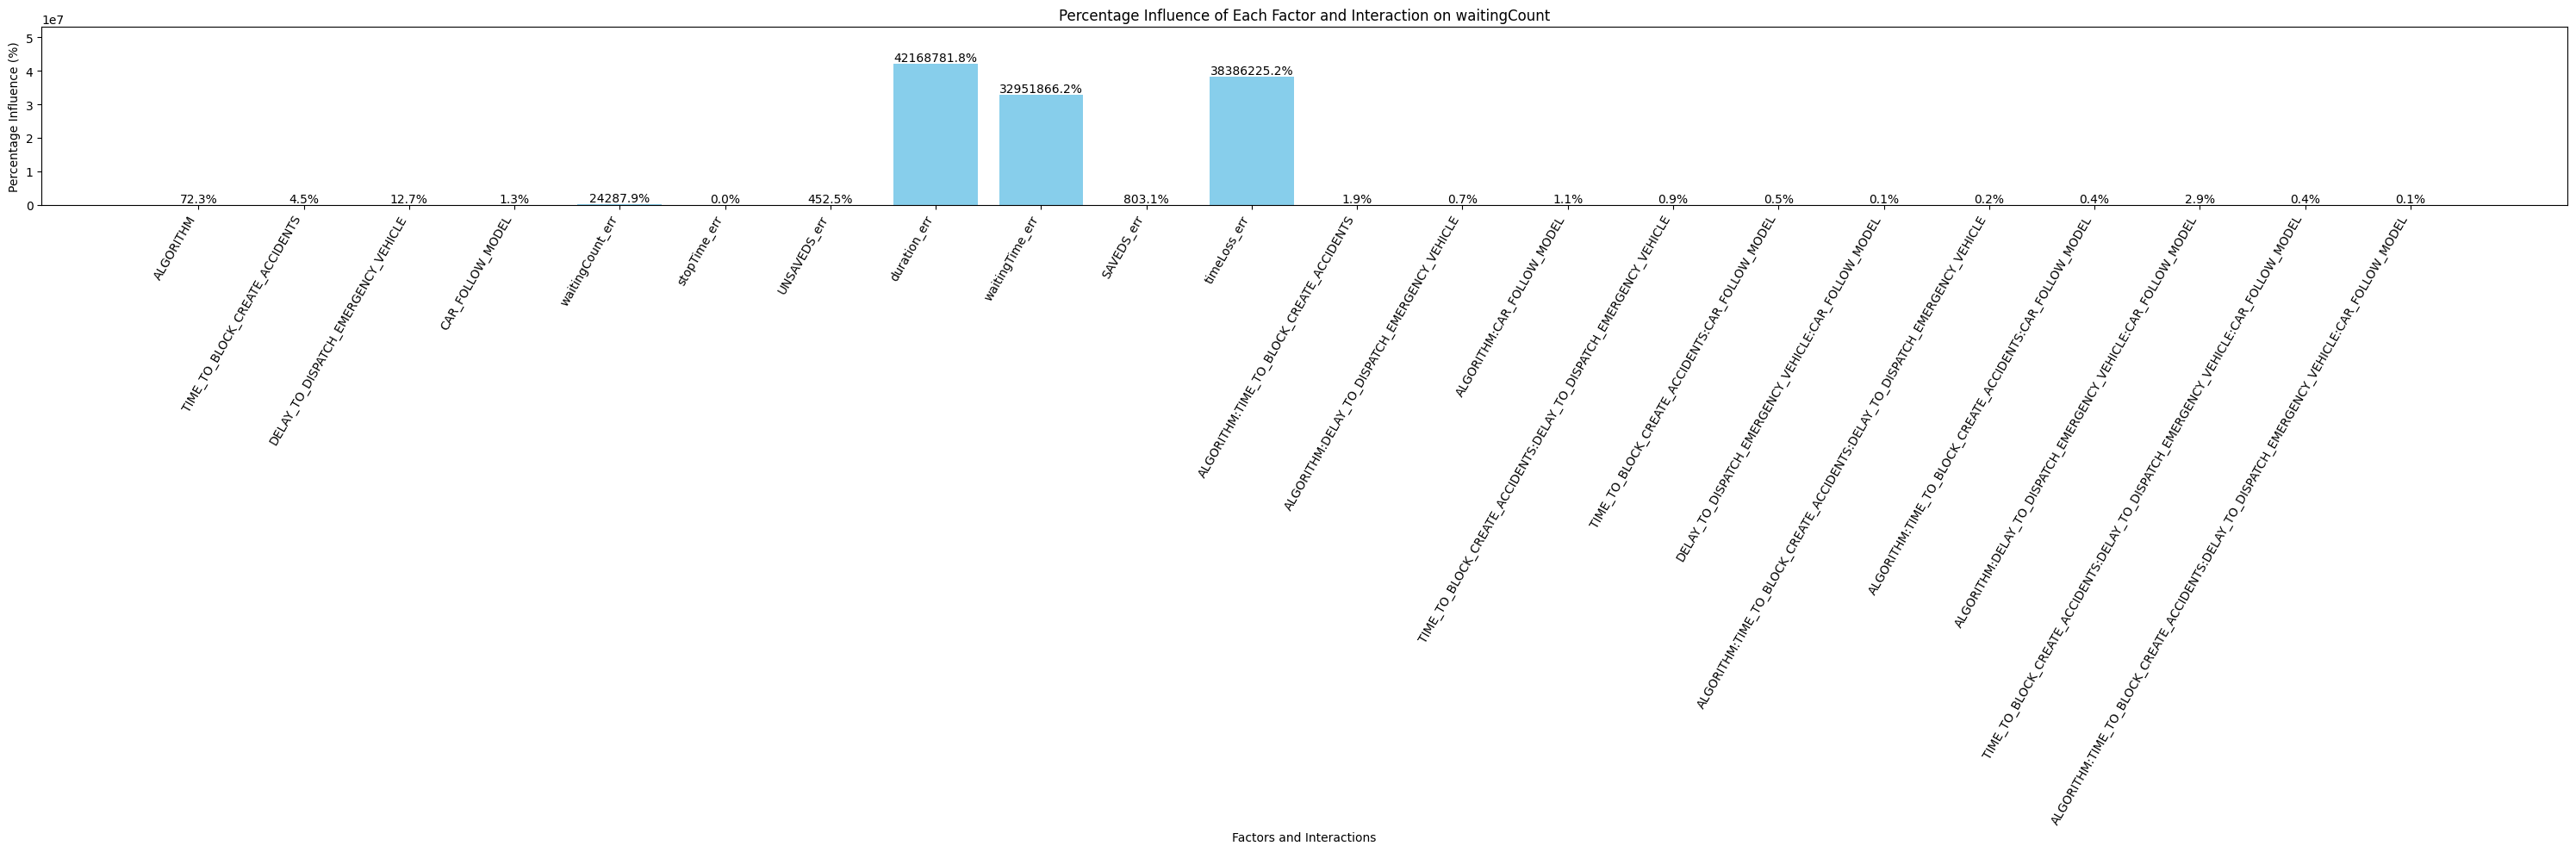

/tmp/ipykernel_52624/4010592474.py:7: RuntimeWarning: invalid value encountered in scalar divide
  influences = [(ss / SST) * 100 for ss in SS.values()]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and po

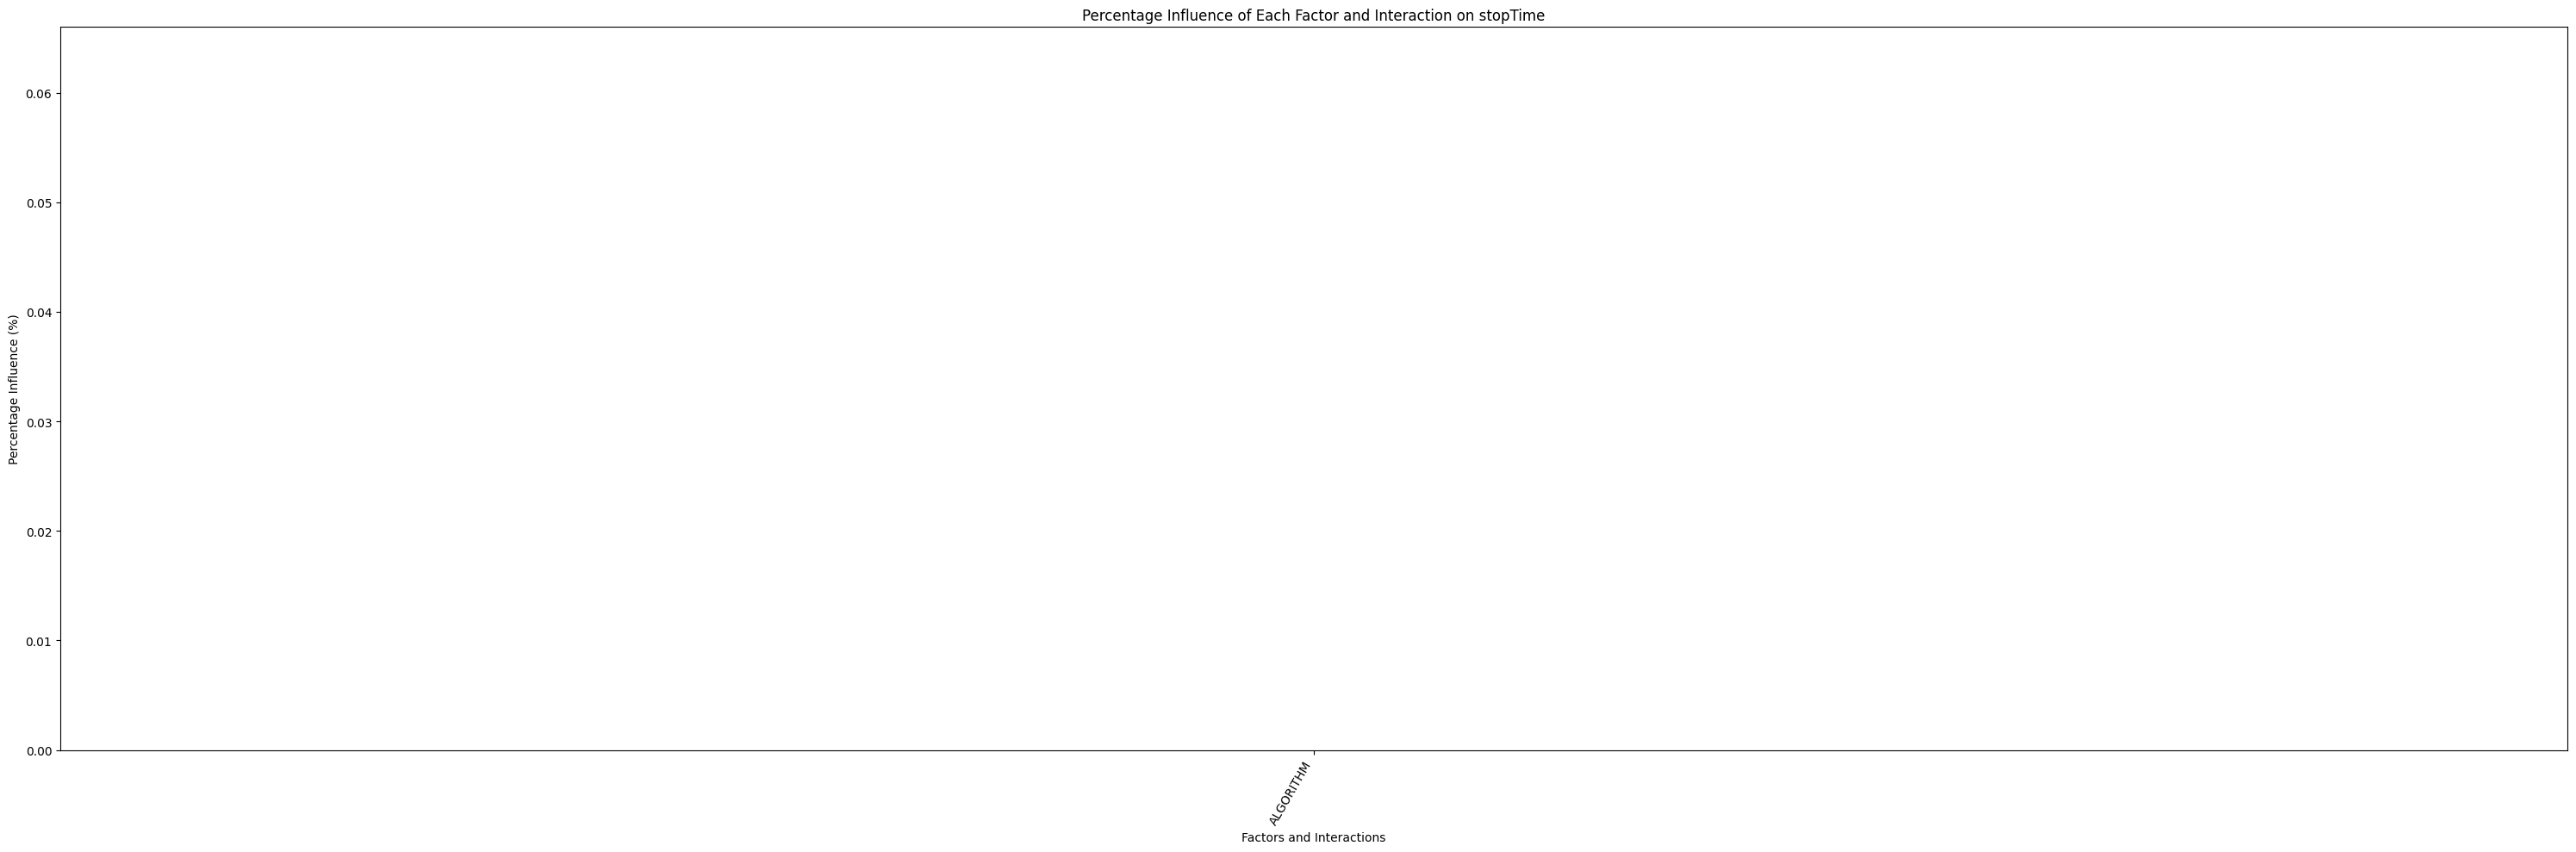

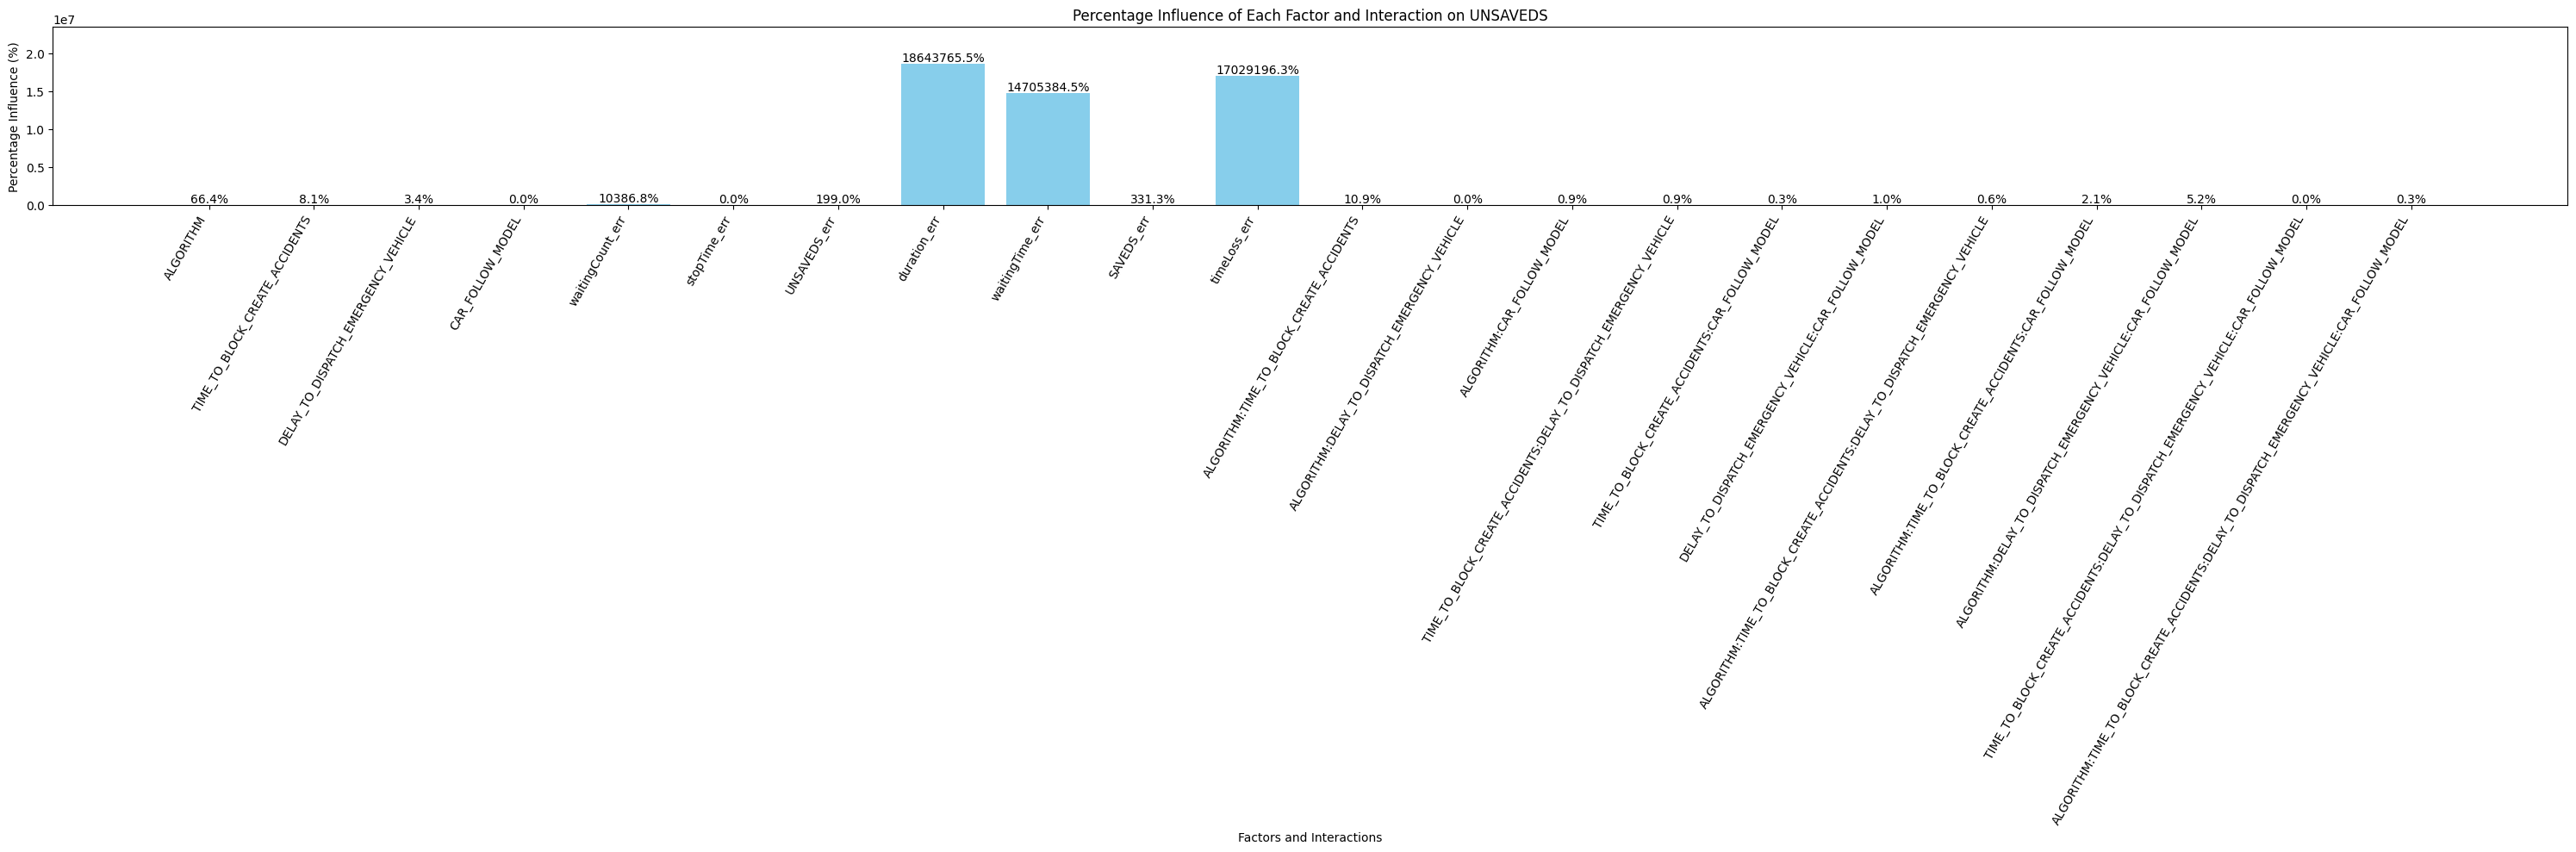

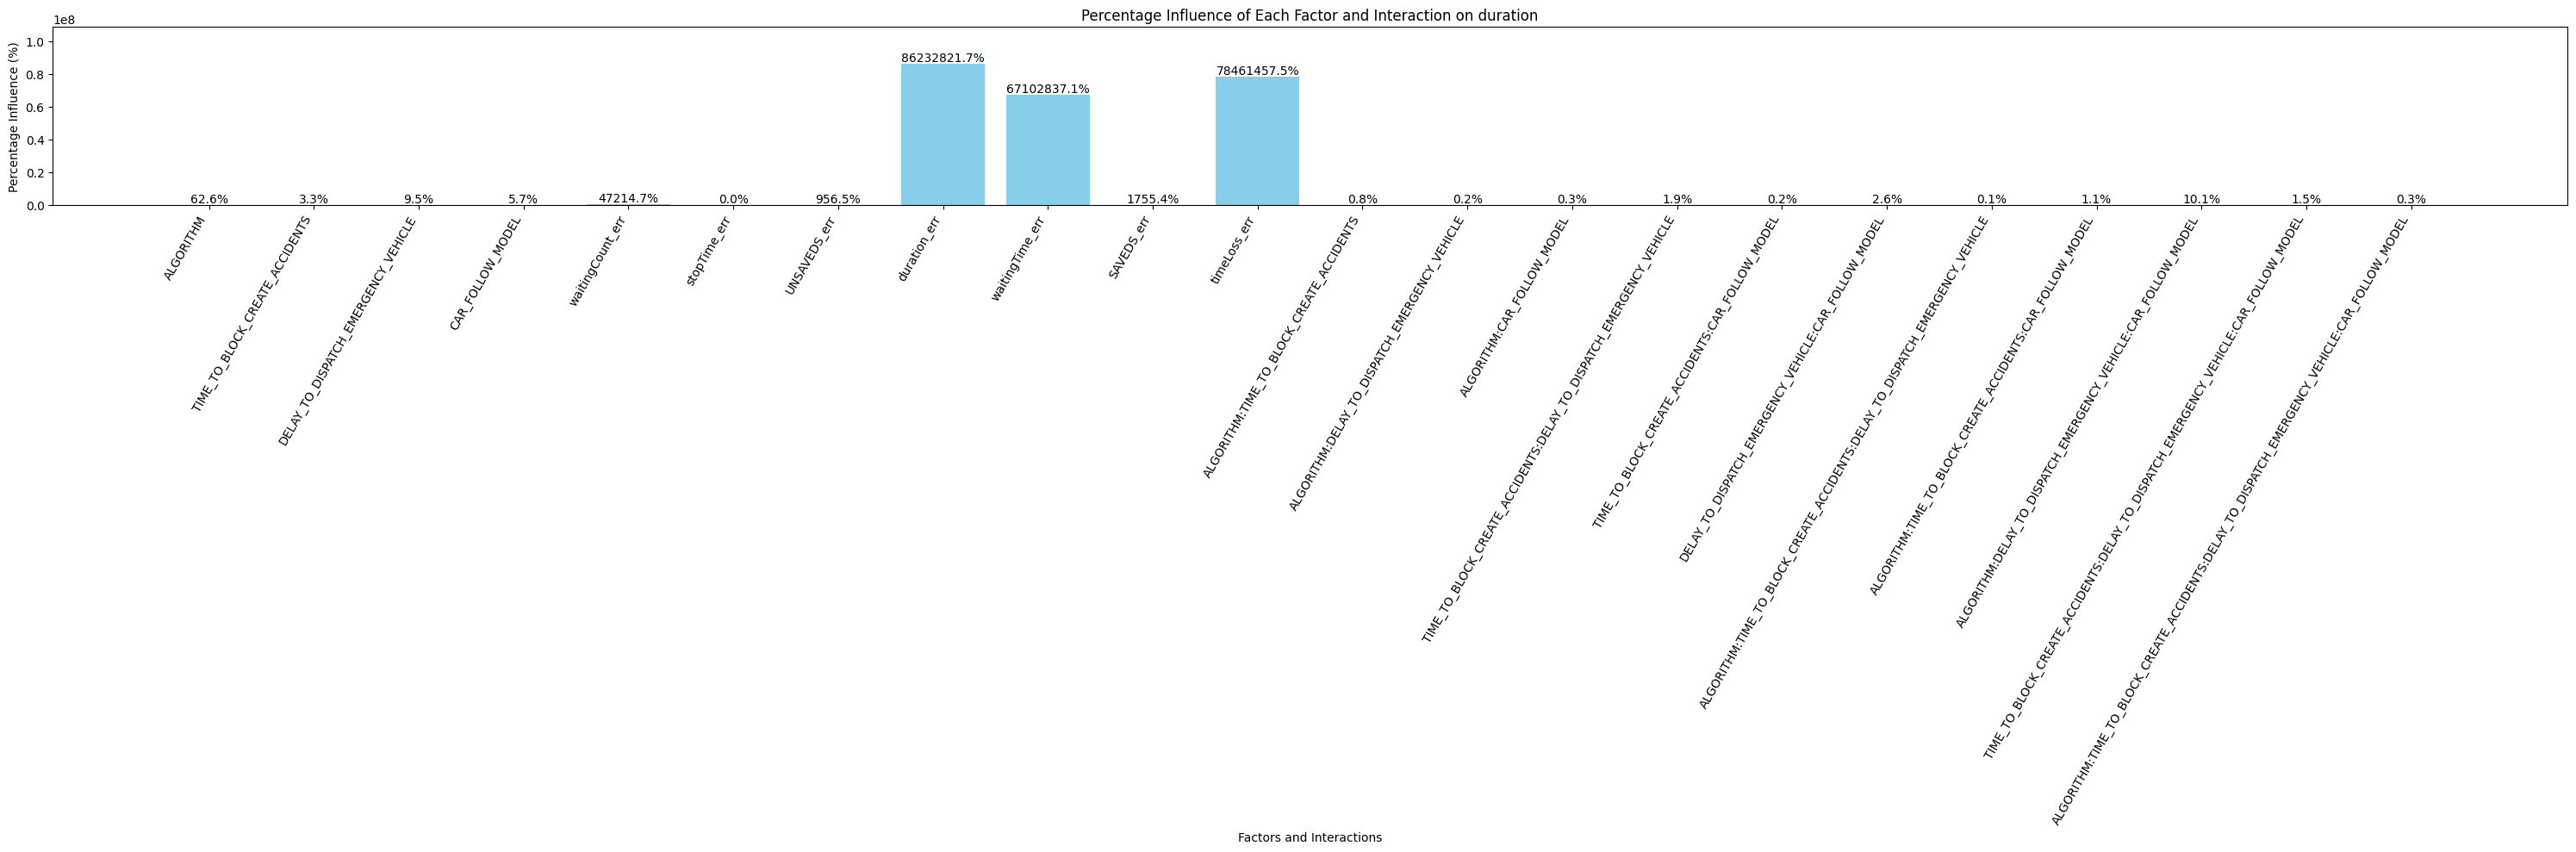

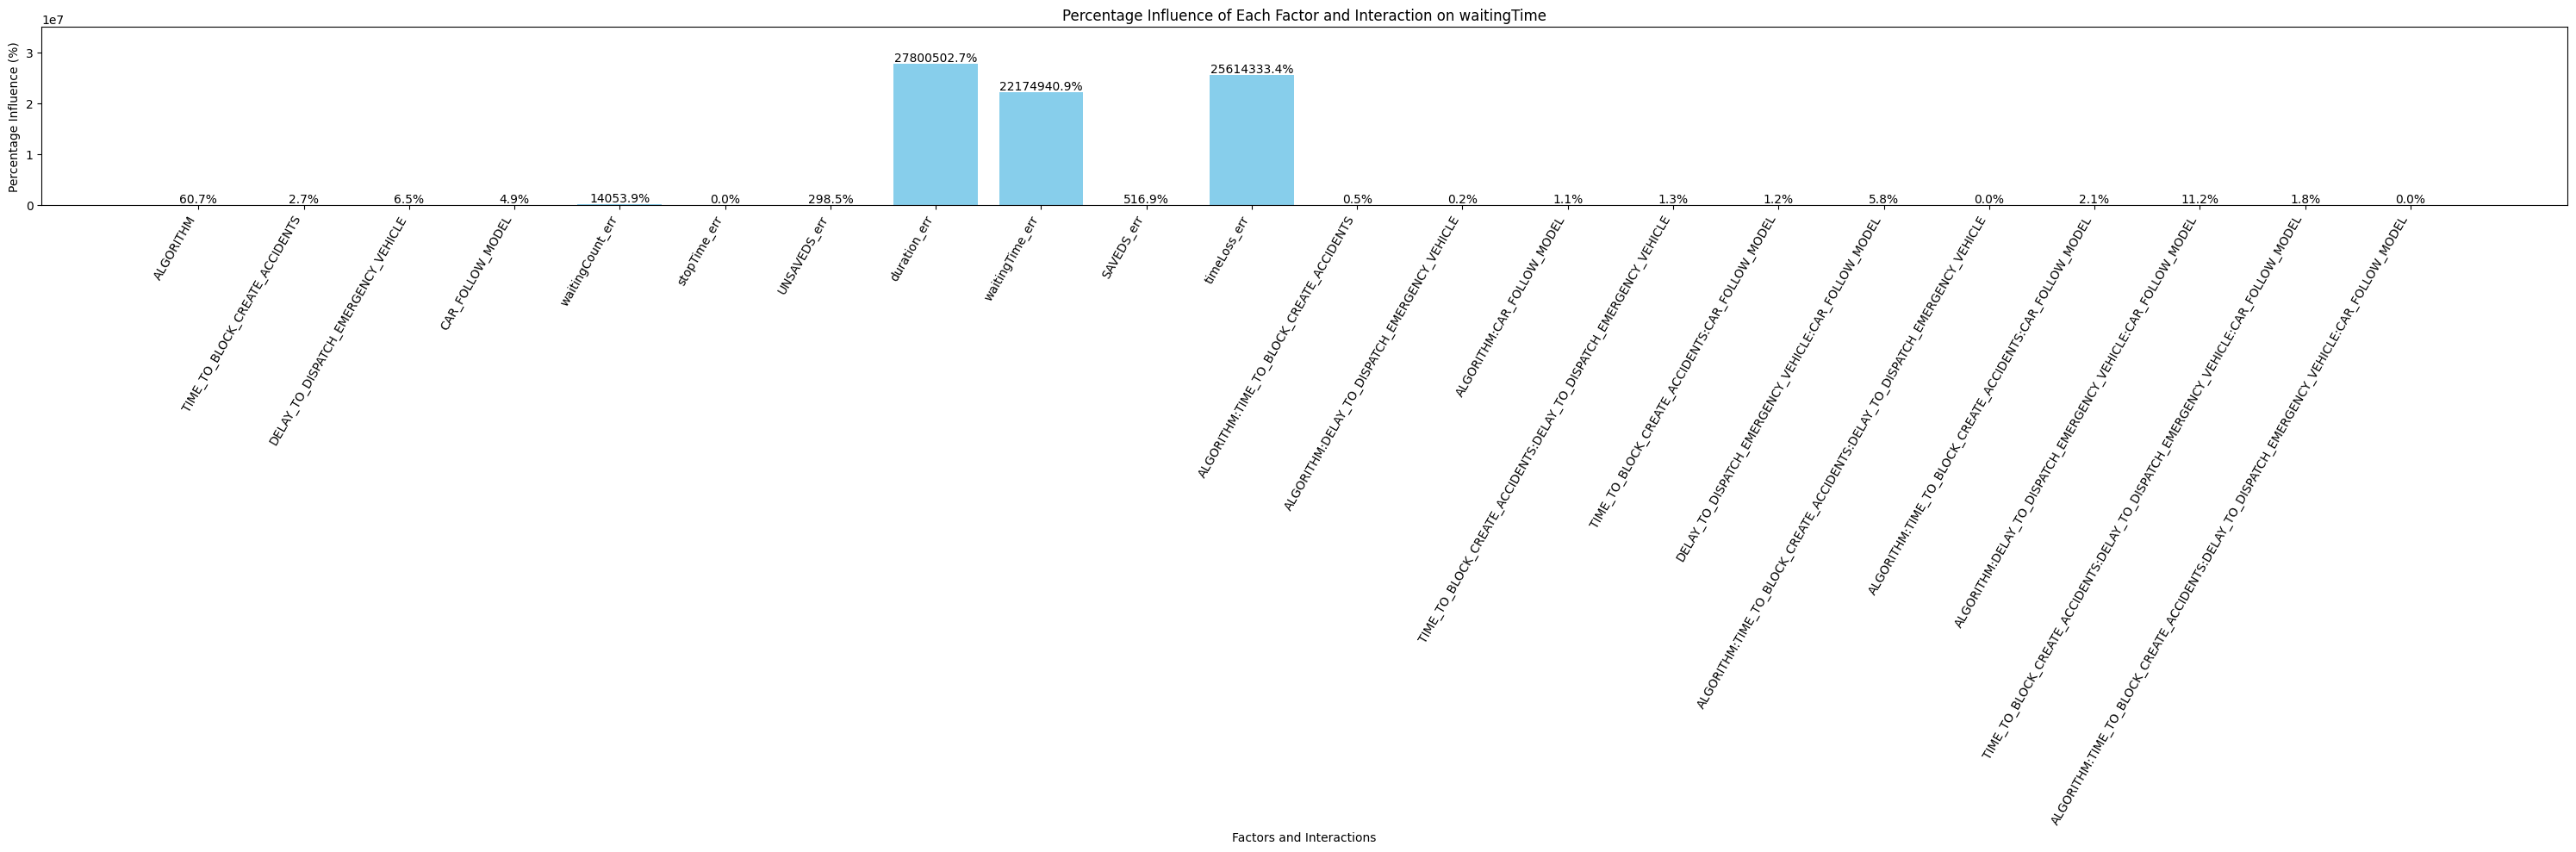

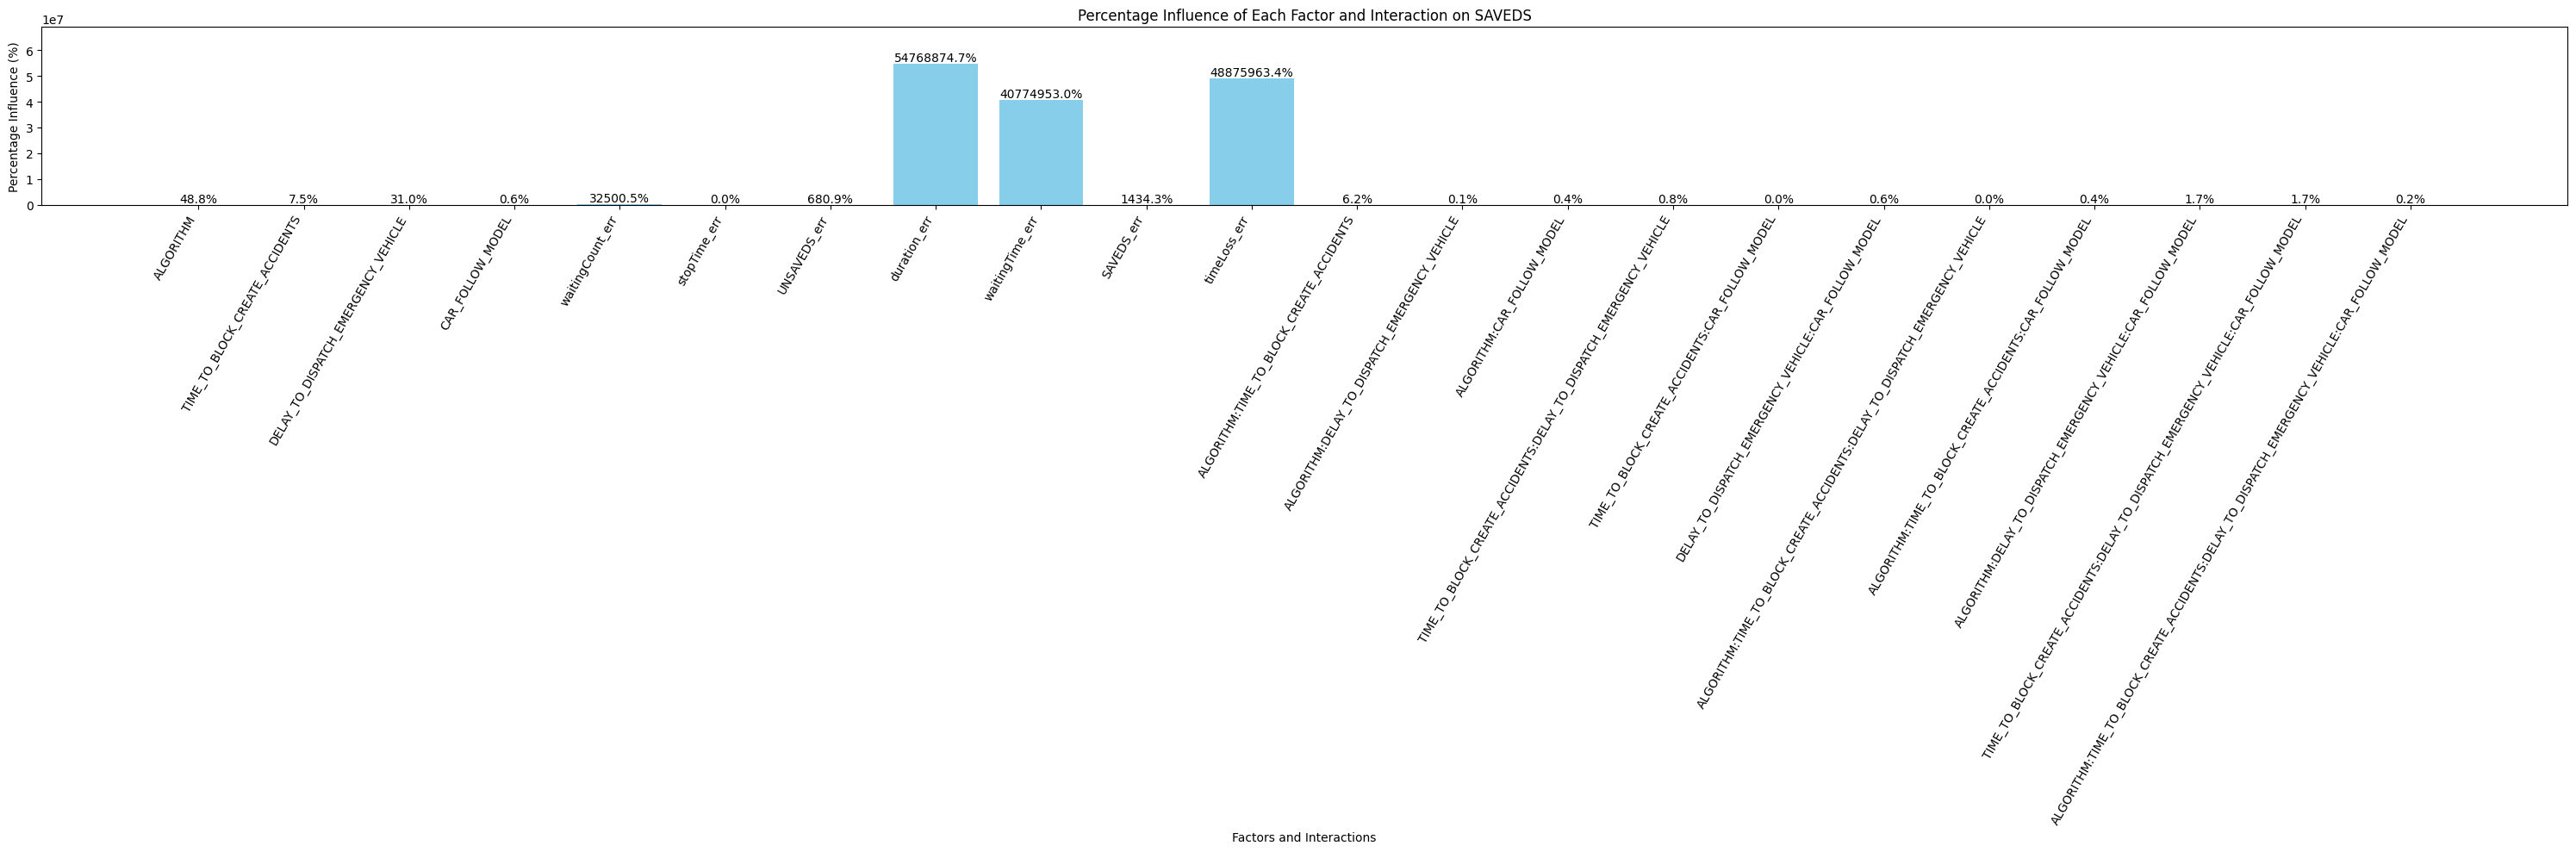

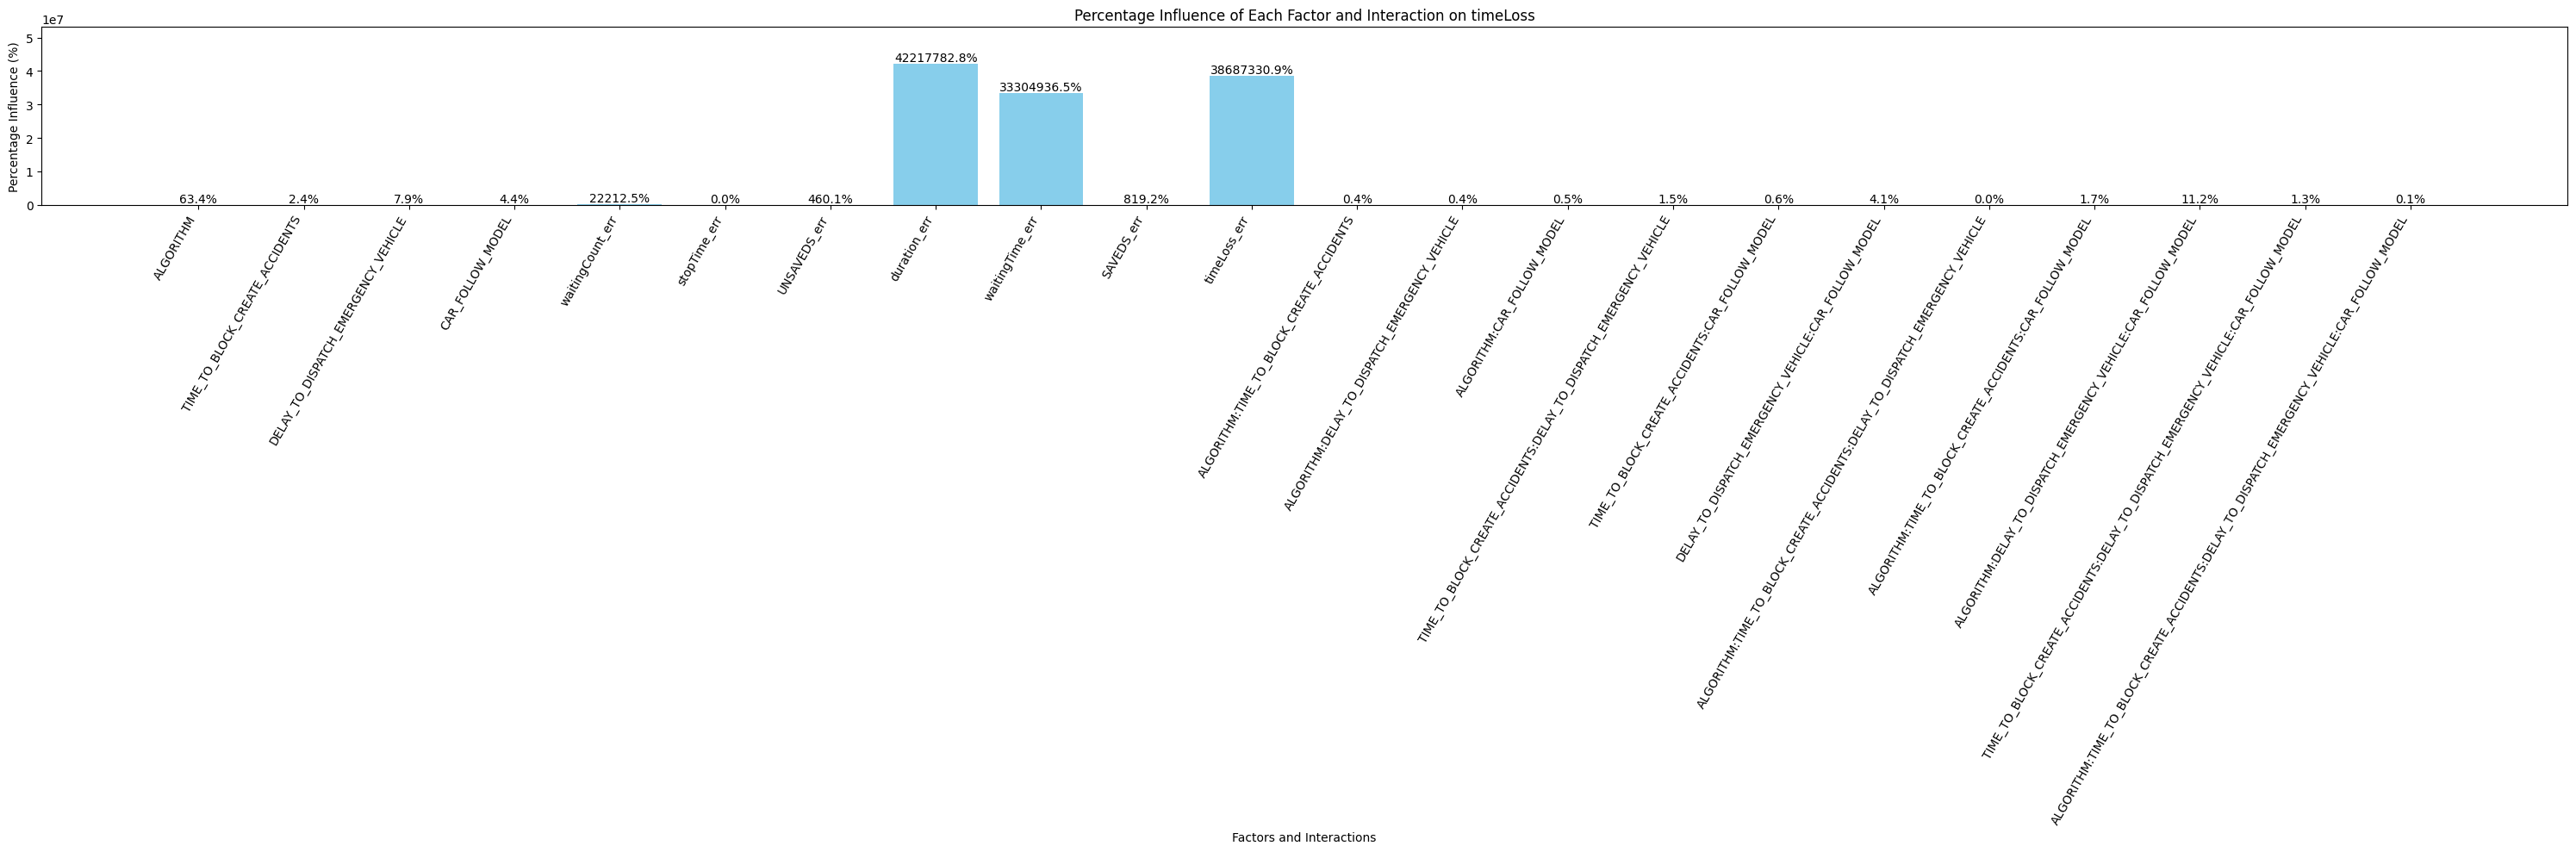

In [24]:
# Adapted function to plot formatted results
def plot_formatted_results(results):
    print(results.items())
    for response_var_name, (effects, SS, SST) in results.items():
        # Organizing data for plotting
        names = list(effects.keys())
        influences = [(ss / SST) * 100 for ss in SS.values()]

        # Creating the plot
        plt.figure(figsize=(30, 10))
        plt.bar(names, influences, color='skyblue')
        plt.title(f"Percentage Influence of Each Factor and Interaction on {response_var_name}")
        plt.ylabel('Percentage Influence (%)')
        # Adjusting the y-axis limits to ensure labels fit without cutting off
        plt.ylim(0, plt.ylim()[1] * 1.2)  # Increase the upper y-axis limit by 20%
        plt.xlabel('Factors and Interactions')
        plt.xticks(rotation=60, ha="right")
        plt.tight_layout()

        # Adding percentage labels above bars
        for i, influence in enumerate(influences):
            plt.text(i, influence + 0.5, f"{influence:.1f}%", ha='center', va='bottom')
        
        plt.tight_layout()
        plt.savefig('../plot/Tripinfo_Emergency_Vehicle_Experiment/{}.pdf'.format(response_var_name), format='pdf')
        plt.show()

# Assuming 'results' has been previously calculated by the provided code
# results = calculate_effects_SS_dynamic(experiment_design_df, response_vars_names)
# Printing formatted results
# print_formatted_results(results)
# Calling the adapted function to plot the results
plot_formatted_results(results)


### Gráfico 5

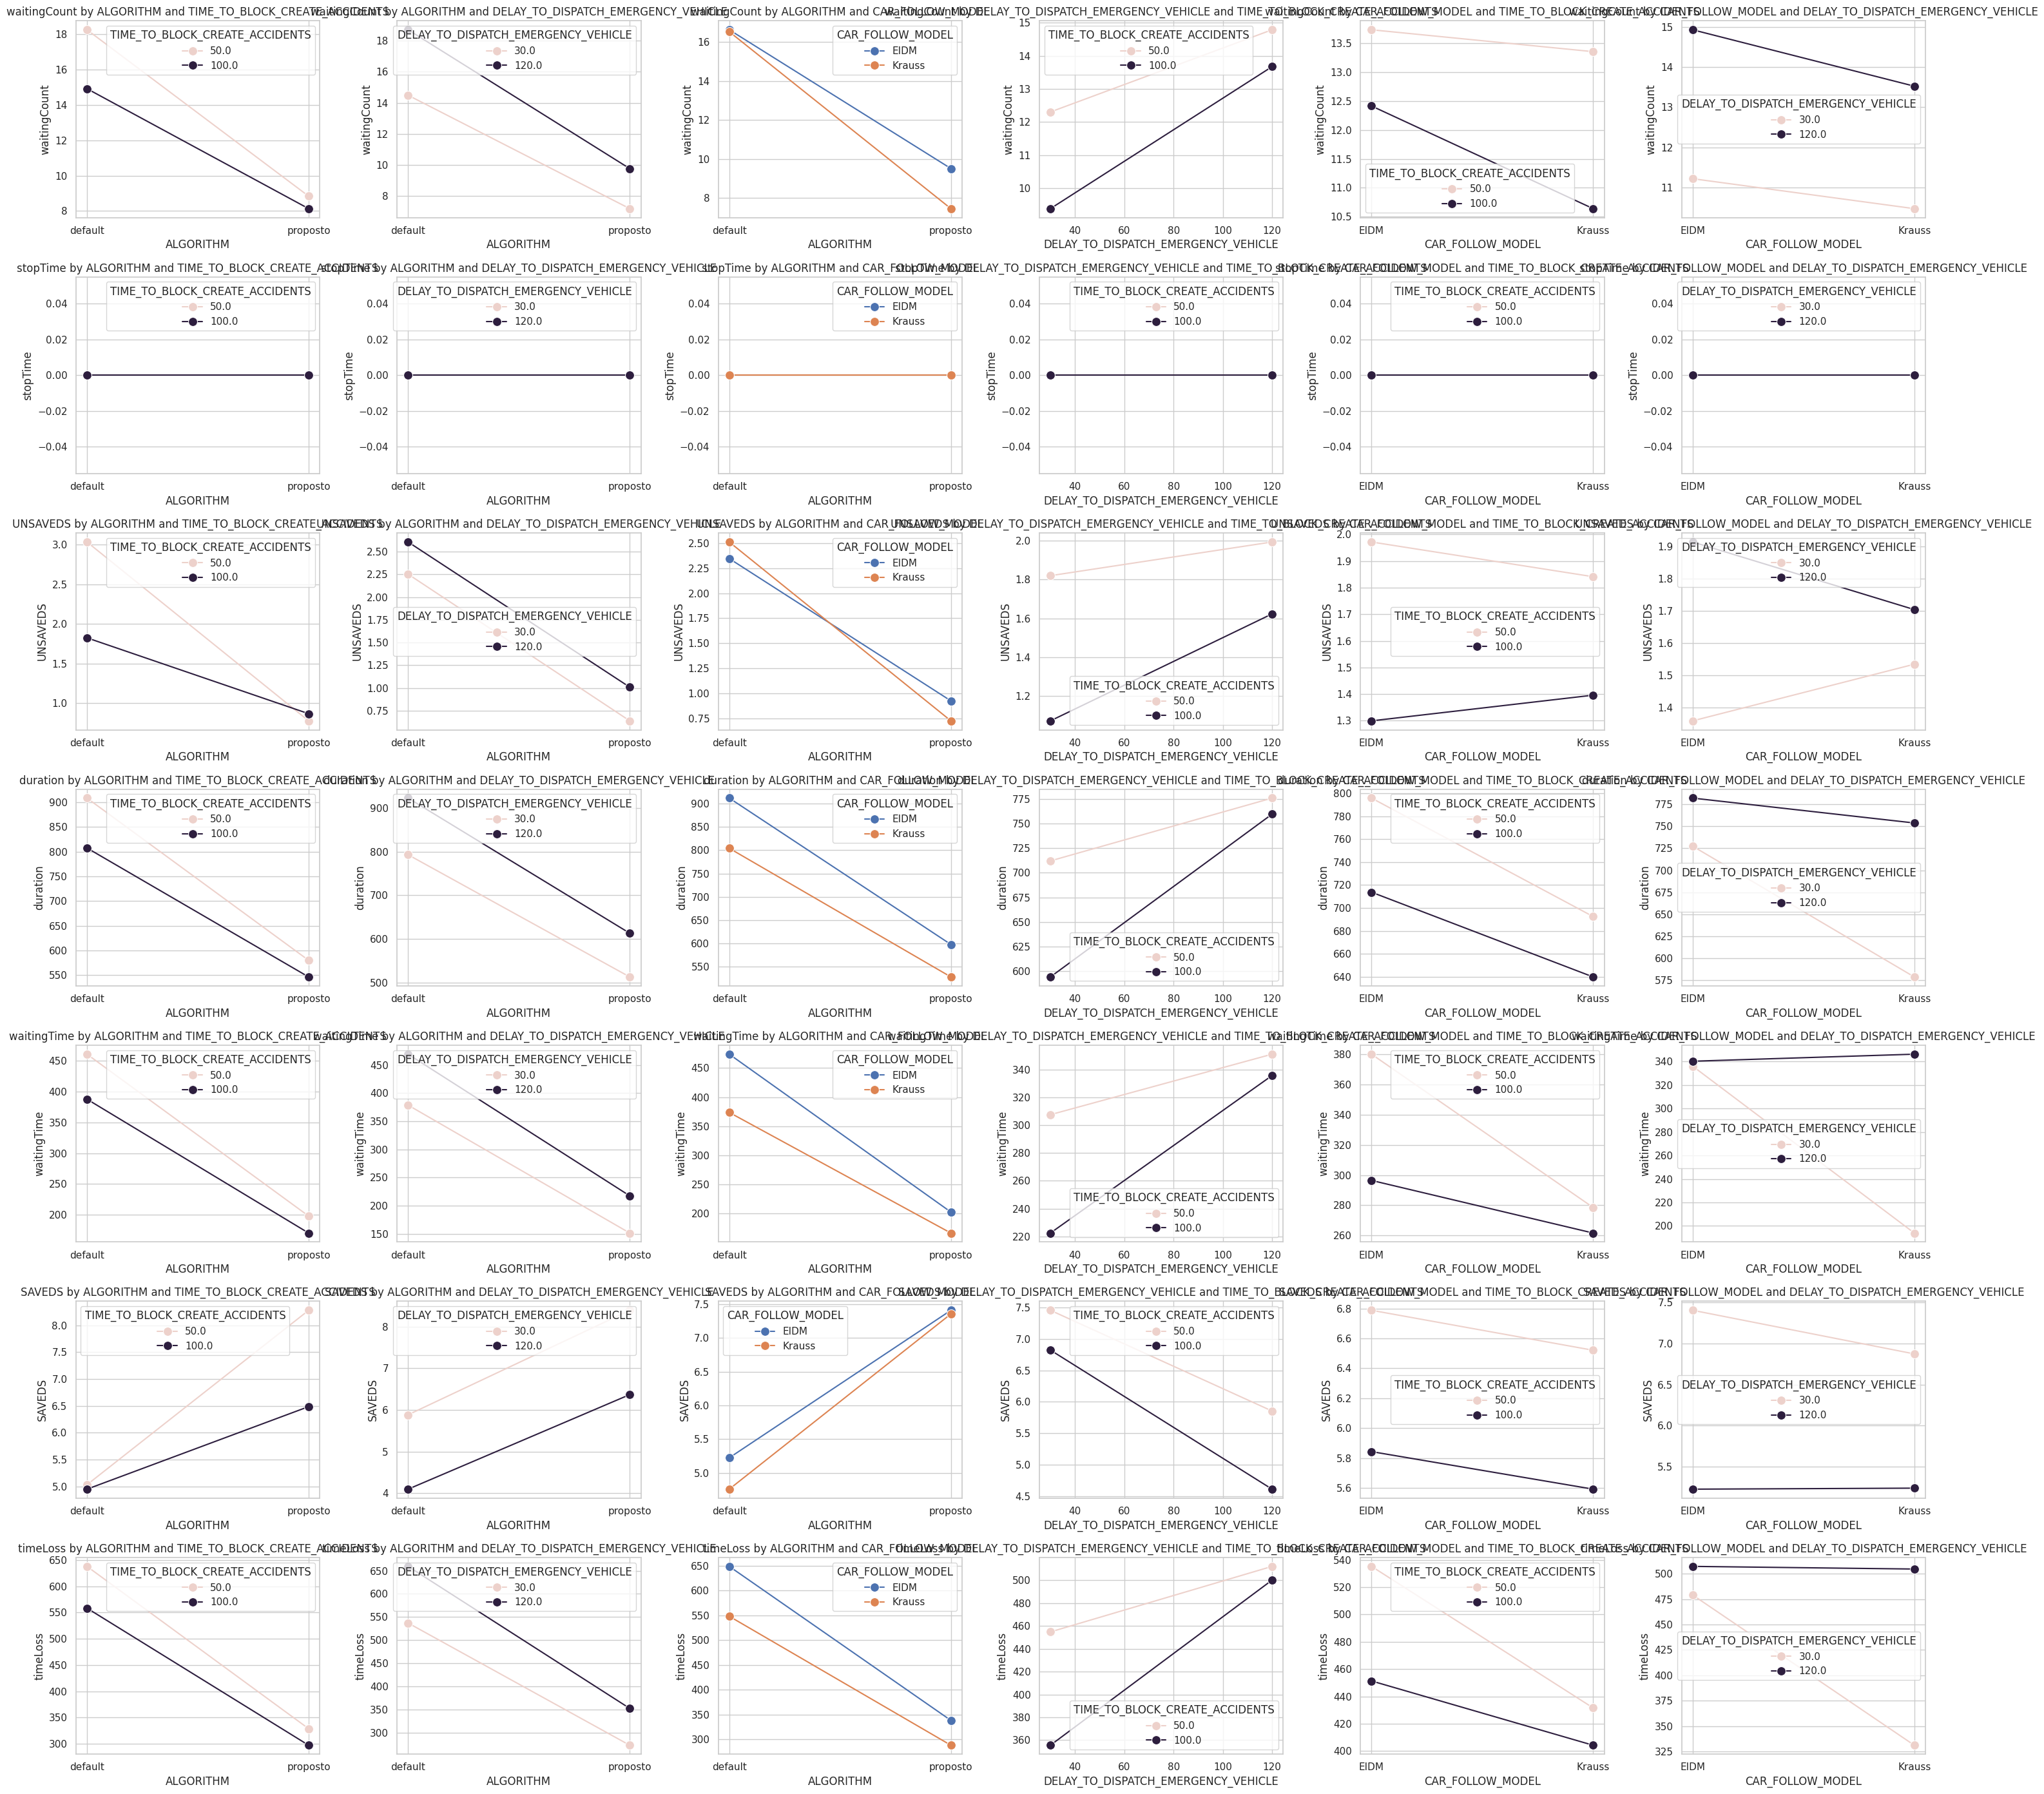

In [25]:
def plot_interaction_matrix_subplot(df, response_vars_names, factor_names):
    sns.set(style="whitegrid")
    
    # Determining the number of subplots needed based on the number of factor combinations
    num_factors = len(factor_names)
    num_combinations = num_factors * (num_factors - 1) // 2
    num_rows = len(response_vars_names)
    num_cols = max(1, num_combinations)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    if num_rows == 1:
        axes = [axes]
    if num_cols == 1:
        axes = np.array([axes]).transpose()
    
    for i, response_var_name in enumerate(response_vars_names):
        ax_index = 0
        for factor1 in factor_names:
            for factor2 in factor_names:
                if factor1 < factor2:  # Ensuring we don't repeat combinations
                    # Filtering data for the two factors and the current response variable
                    plot_data = df[[factor1, factor2, response_var_name]].dropna()
                    
                    # Selecting the correct subplot
                    ax = axes[i, ax_index] if num_rows > 1 else axes[ax_index]
                    
                    # Creating the interaction plot
                    interaction_plot = sns.lineplot(x=factor1, y=response_var_name, hue=factor2, data=plot_data, 
                                                    marker='o', linestyle='-', markersize=10, errorbar=None, ax=ax)
                    interaction_plot.set_title(f'{response_var_name} by {factor1} and {factor2}')
                    interaction_plot.set_xlabel(factor1)
                    interaction_plot.set_ylabel(response_var_name)
                    ax.legend(title=factor2)
                    
                    ax_index += 1
                    
    plt.tight_layout()
    plt.savefig('../plot/Tripinfo_Emergency_Vehicle_Experiment/interaction_matrix_subplot.pdf', format='pdf')
    plt.show()

# Adjusted function call
plot_interaction_matrix_subplot(experiment_settings_real_df, response_vars_names, factor_names)
